In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### PC Files

In [2]:
#PC

# dnn_res_500: results for all the dataset when changing p_max and r_min (the tables) for 500 iterations.
dnn_res_500_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\dnn_res_500.pkl"
dnn_res_500 = pickle.load(open(dnn_res_500_p, 'rb'))

# dnn_res_100: results for all the dataset when changing p_max and r_min (the tables) for 100 iterations.
dnn_res_100_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\dnn_res.pkl"
dnn_res_100 = pickle.load(open(dnn_res_100_p, 'rb'))

# GA Results
ga_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\GA.pkl"
ga = pickle.load(open(ga_p, 'rb'))

# dnn_res_300
dnn_300_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\dnn_N_300_n.pkl"
dnn_res_300 = pickle.load(open(dnn_300_p, 'rb'))

# ga_res_300
ga_300_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\GA_N.pkl"
ga_res_300 = pickle.load(open(ga_300_p, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\result\\dnn_res_500.pkl'

### Mac Files

In [3]:
#Mac

# dnn_res_500: results for all the dataset when changing p_max and r_min (the tables) for 500 iterations.
dnn_res_500_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_res_500.pkl"
dnn_res_500 = pickle.load(open(dnn_res_500_p, 'rb'))

# dnn_res_100: results for all the dataset when changing p_max and r_min (the tables) for 100 iterations.
dnn_res_100_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_res.pkl"
dnn_res_100 = pickle.load(open(dnn_res_100_p, 'rb'))

# GA Results
ga_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/GA.pkl"
ga = pickle.load(open(ga_p, 'rb'))

# dnn_res_300
dnn_300_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_N_300_n.pkl"
dnn_res_300 = pickle.load(open(dnn_300_p, 'rb'))

# ga_res_300
ga_300_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/GA_N.pkl"
ga_res_300 = pickle.load(open(ga_300_p, 'rb'))

# Time complexities
dnn_time_500_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_time_p_500.pkl"
dnn_time_500 = pickle.load(open(dnn_time_500_p, 'rb'))

### Convergence Plot: Sum-Rate over Number of Epochs for $r_{\text{min}} =2.5$,  $P_{\text{max}} =2$, 20 iterations of test projection. Dataset 17, 

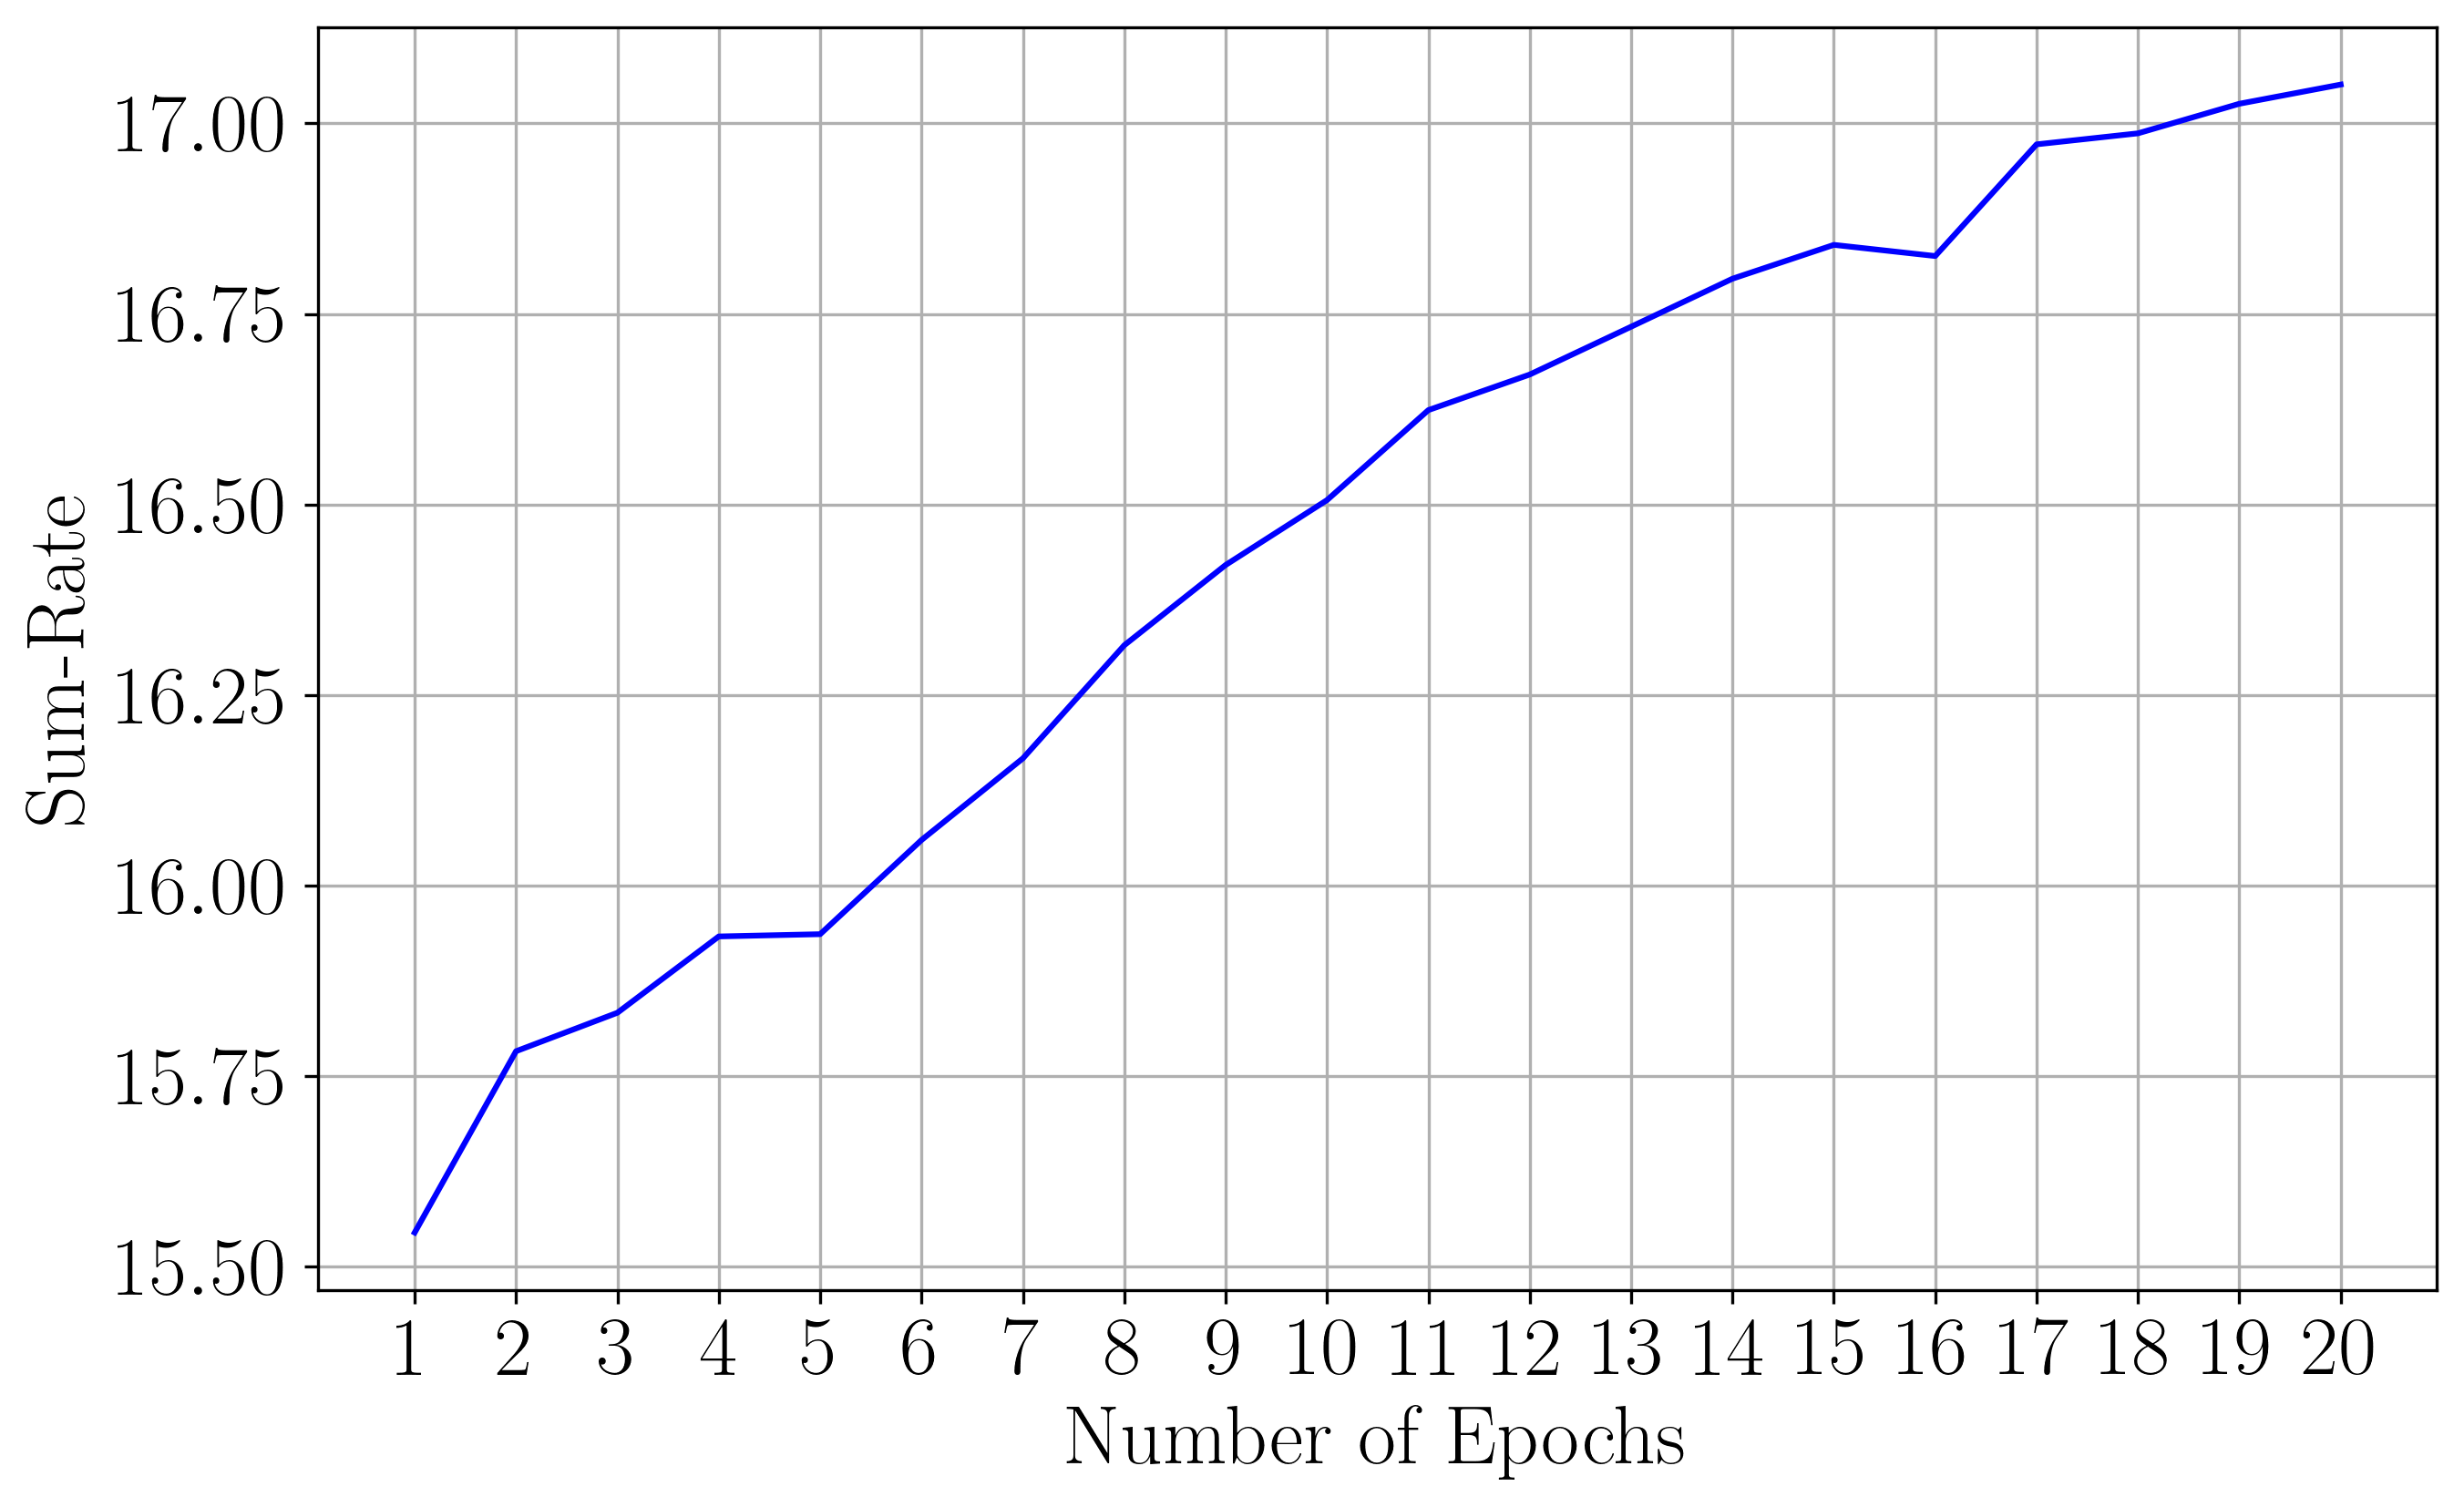

In [46]:
test_sum_rate = [15.544881, 15.782781, 15.833259, 15.933355, 15.936318, 16.059851, 16.166970, 16.315320, 16.420632,
                 16.505765, 16.623821, 16.670501, 16.733217, 16.796201, 16.840582, 16.825938, 16.972449, 16.986896,
                 17.025704, 17.050888]

x_values = range(1,21)

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

plt.figure(figsize=(10, 6), dpi=300)

# Plotting the convergence data
plt.plot(x_values, test_sum_rate, linestyle='-', color='blue', markersize=8, markeredgewidth=1.5)

plt.xlabel('Number of Epochs', fontsize=22)
plt.ylabel('Sum-Rate', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  # for x-axis
plt.tick_params(axis='y', labelsize=22)  # for y-axis
plt.xticks(x_values)


# Show grid
plt.grid(True)

# Save plot
save_path = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/New_Plots/500_iter/convergence_plot.png"
plt.savefig(save_path, dpi=300)

# Display the plot
plt.show()
plt.close()

### Sumrate over Number of RIS Elements $N$, for $r_{\text{min}} =2$ and $P_{\text{max}}=3$. Dataset 8.

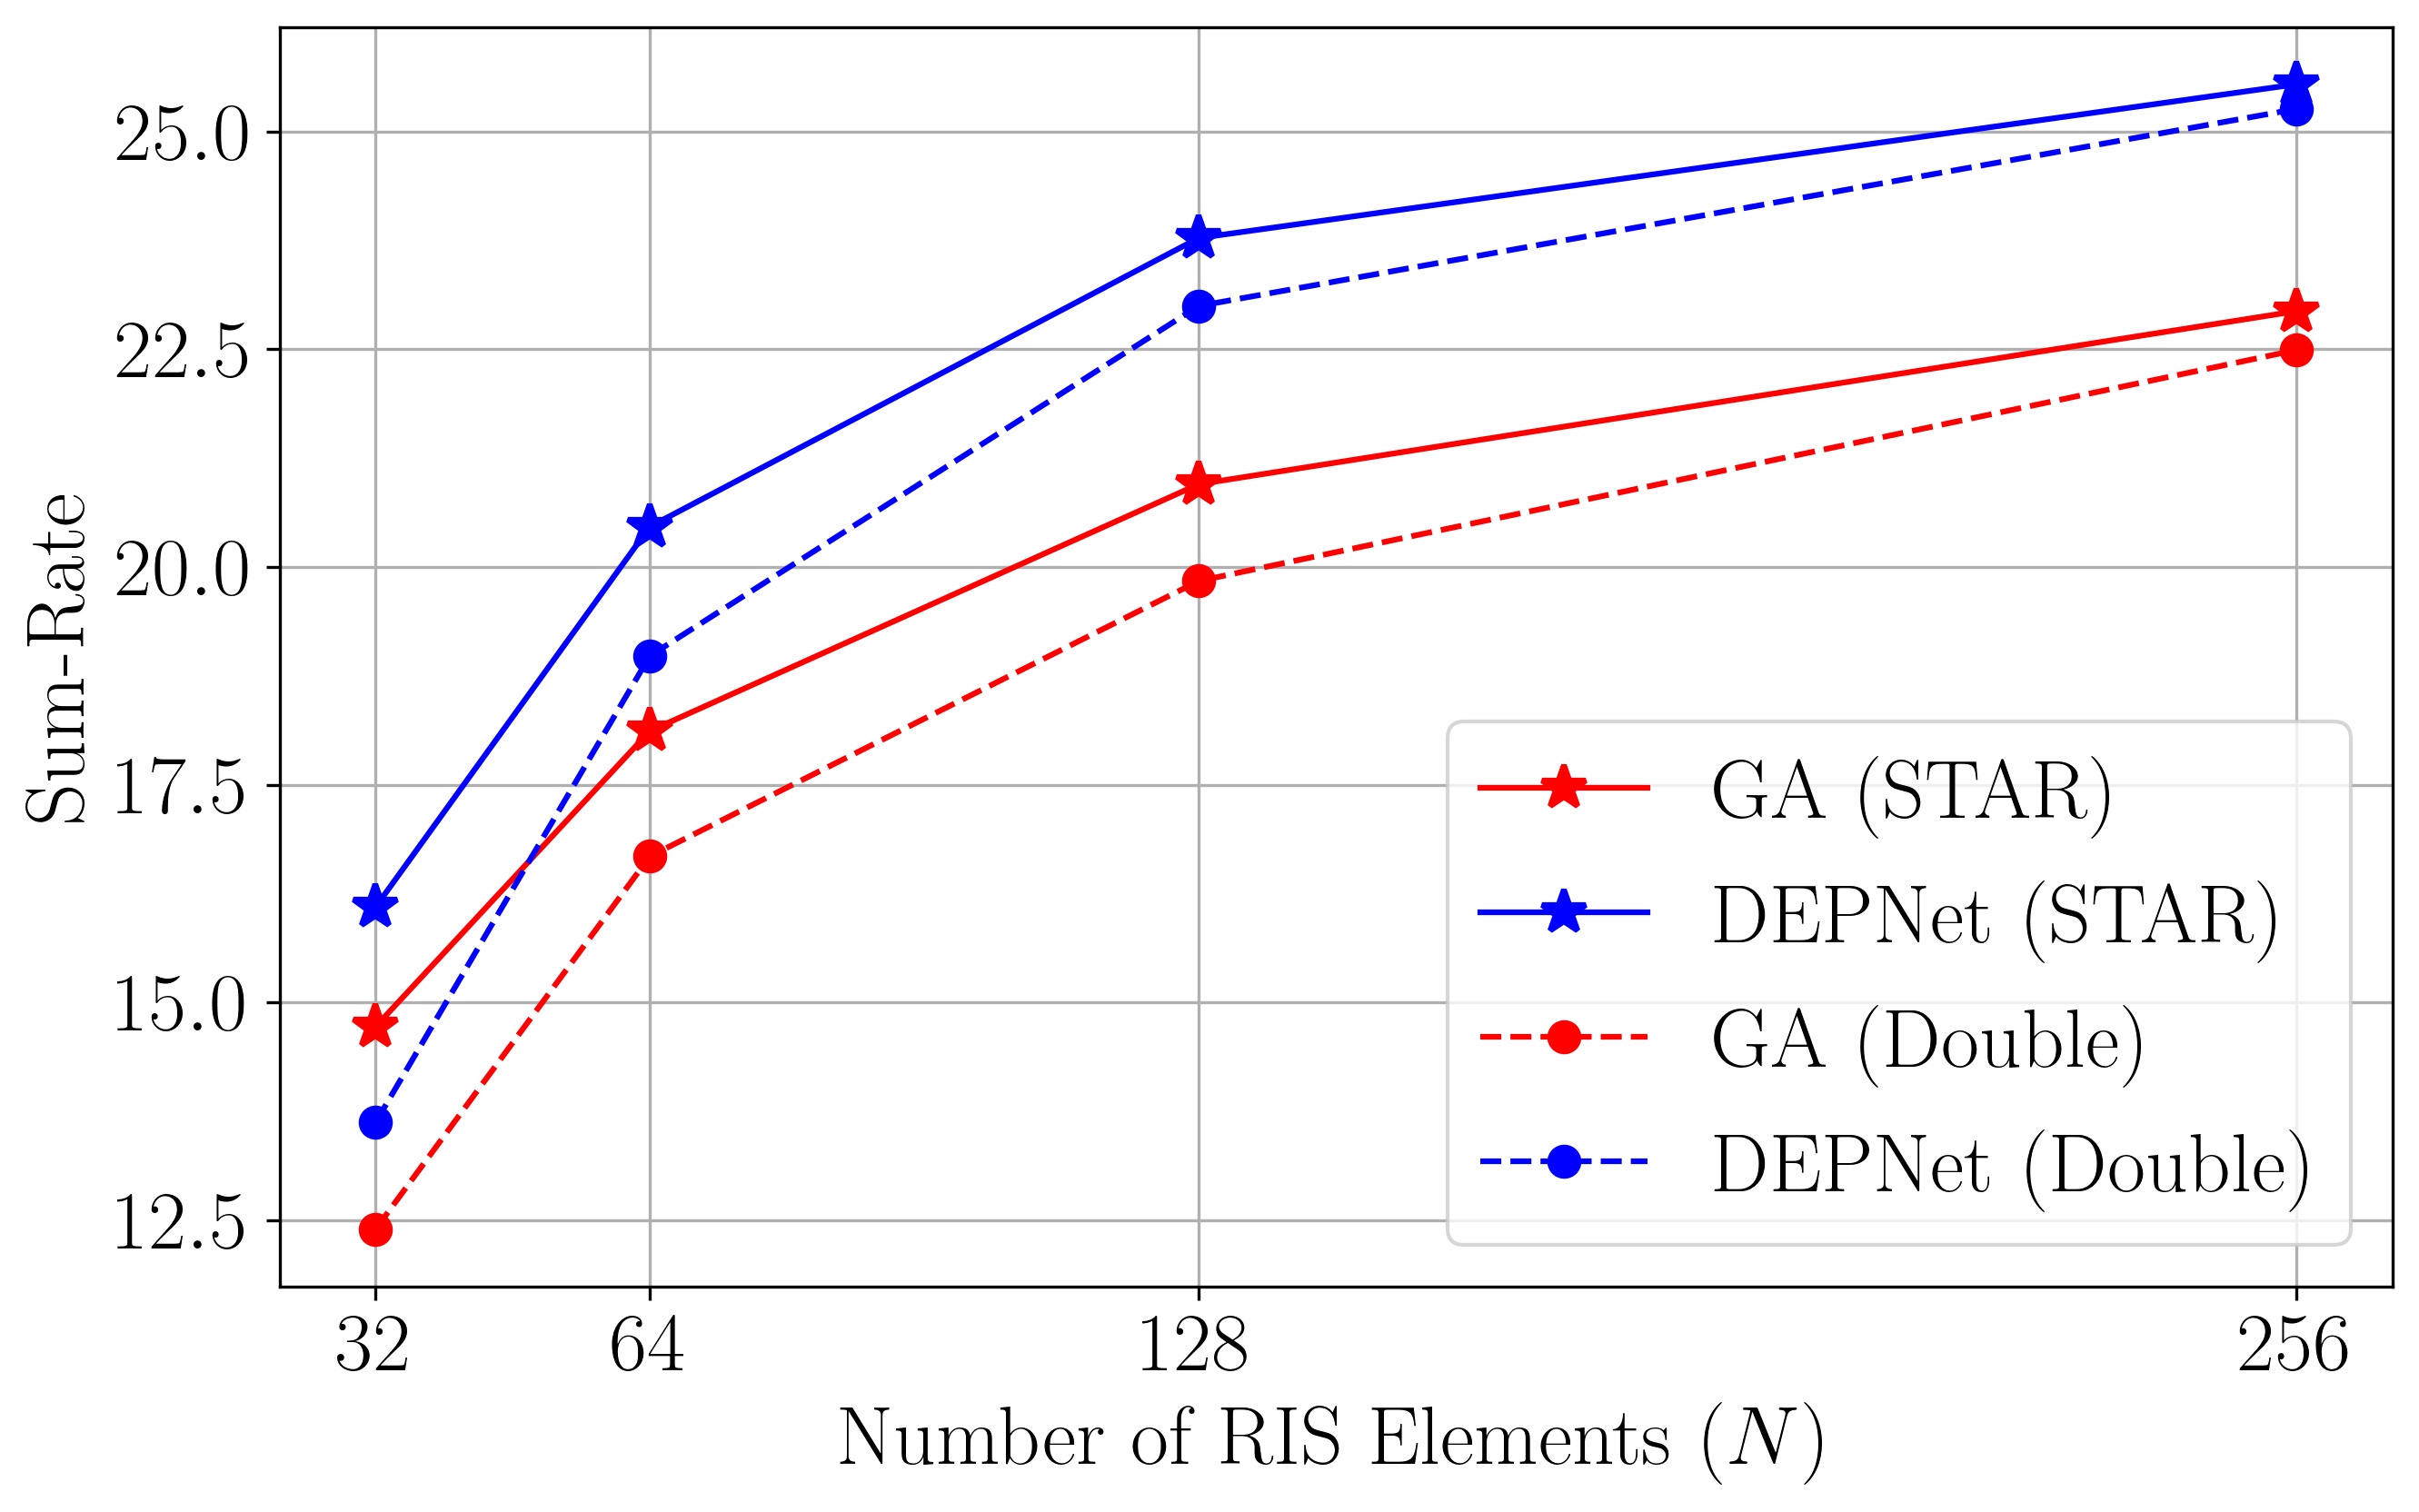

In [4]:
x_values = [32, 64, 128, 256]
dataset_ids=[832, 864, 8128, 8256]
mode = ["Star", "Double"]

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

# Get the dataset ids for r_min = 2
datasets = dataset_ids

# Get the data
DEPNet_star = [dnn_res_300[str(dataset)][mode[0]]["R"] for dataset in datasets]
DEPNet_double = [dnn_res_300[str(dataset)][mode[1]]["R"] for dataset in datasets]
GA_star = [ga_res_300[str(dataset)][mode[0]]["R"] for dataset in datasets]
GA_double = [ga_res_300[str(dataset)][mode[1]]["R"] for dataset in datasets]

# Create the plot
plt.figure(figsize=(10, 6), dpi=300)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)

plt.xlabel('Number of RIS Elements ($N$)', fontsize=22)
plt.ylabel('Sum-Rate', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  # for x-axis
plt.tick_params(axis='y', labelsize=22)  # for y-axis
plt.xticks(x_values)

# Show legend
plt.legend(fontsize=22)

# Show grid
plt.grid(True)

# Save plot
save_path_pc = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\sumrate_ris_elements.png"
save_path_mac = f"/Users/xaviermootoo/Documents/VScode/star-ris-depnet/New_Plots/500_iter/sumrate_ris_elements.png"
plt.savefig(save_path_mac, dpi=300)

# Display the plot
plt.show()
plt.close()

### Time Complexity over $r_{\\{\min}}$ average over all $P_{\text{max}}$ (500 iterations)

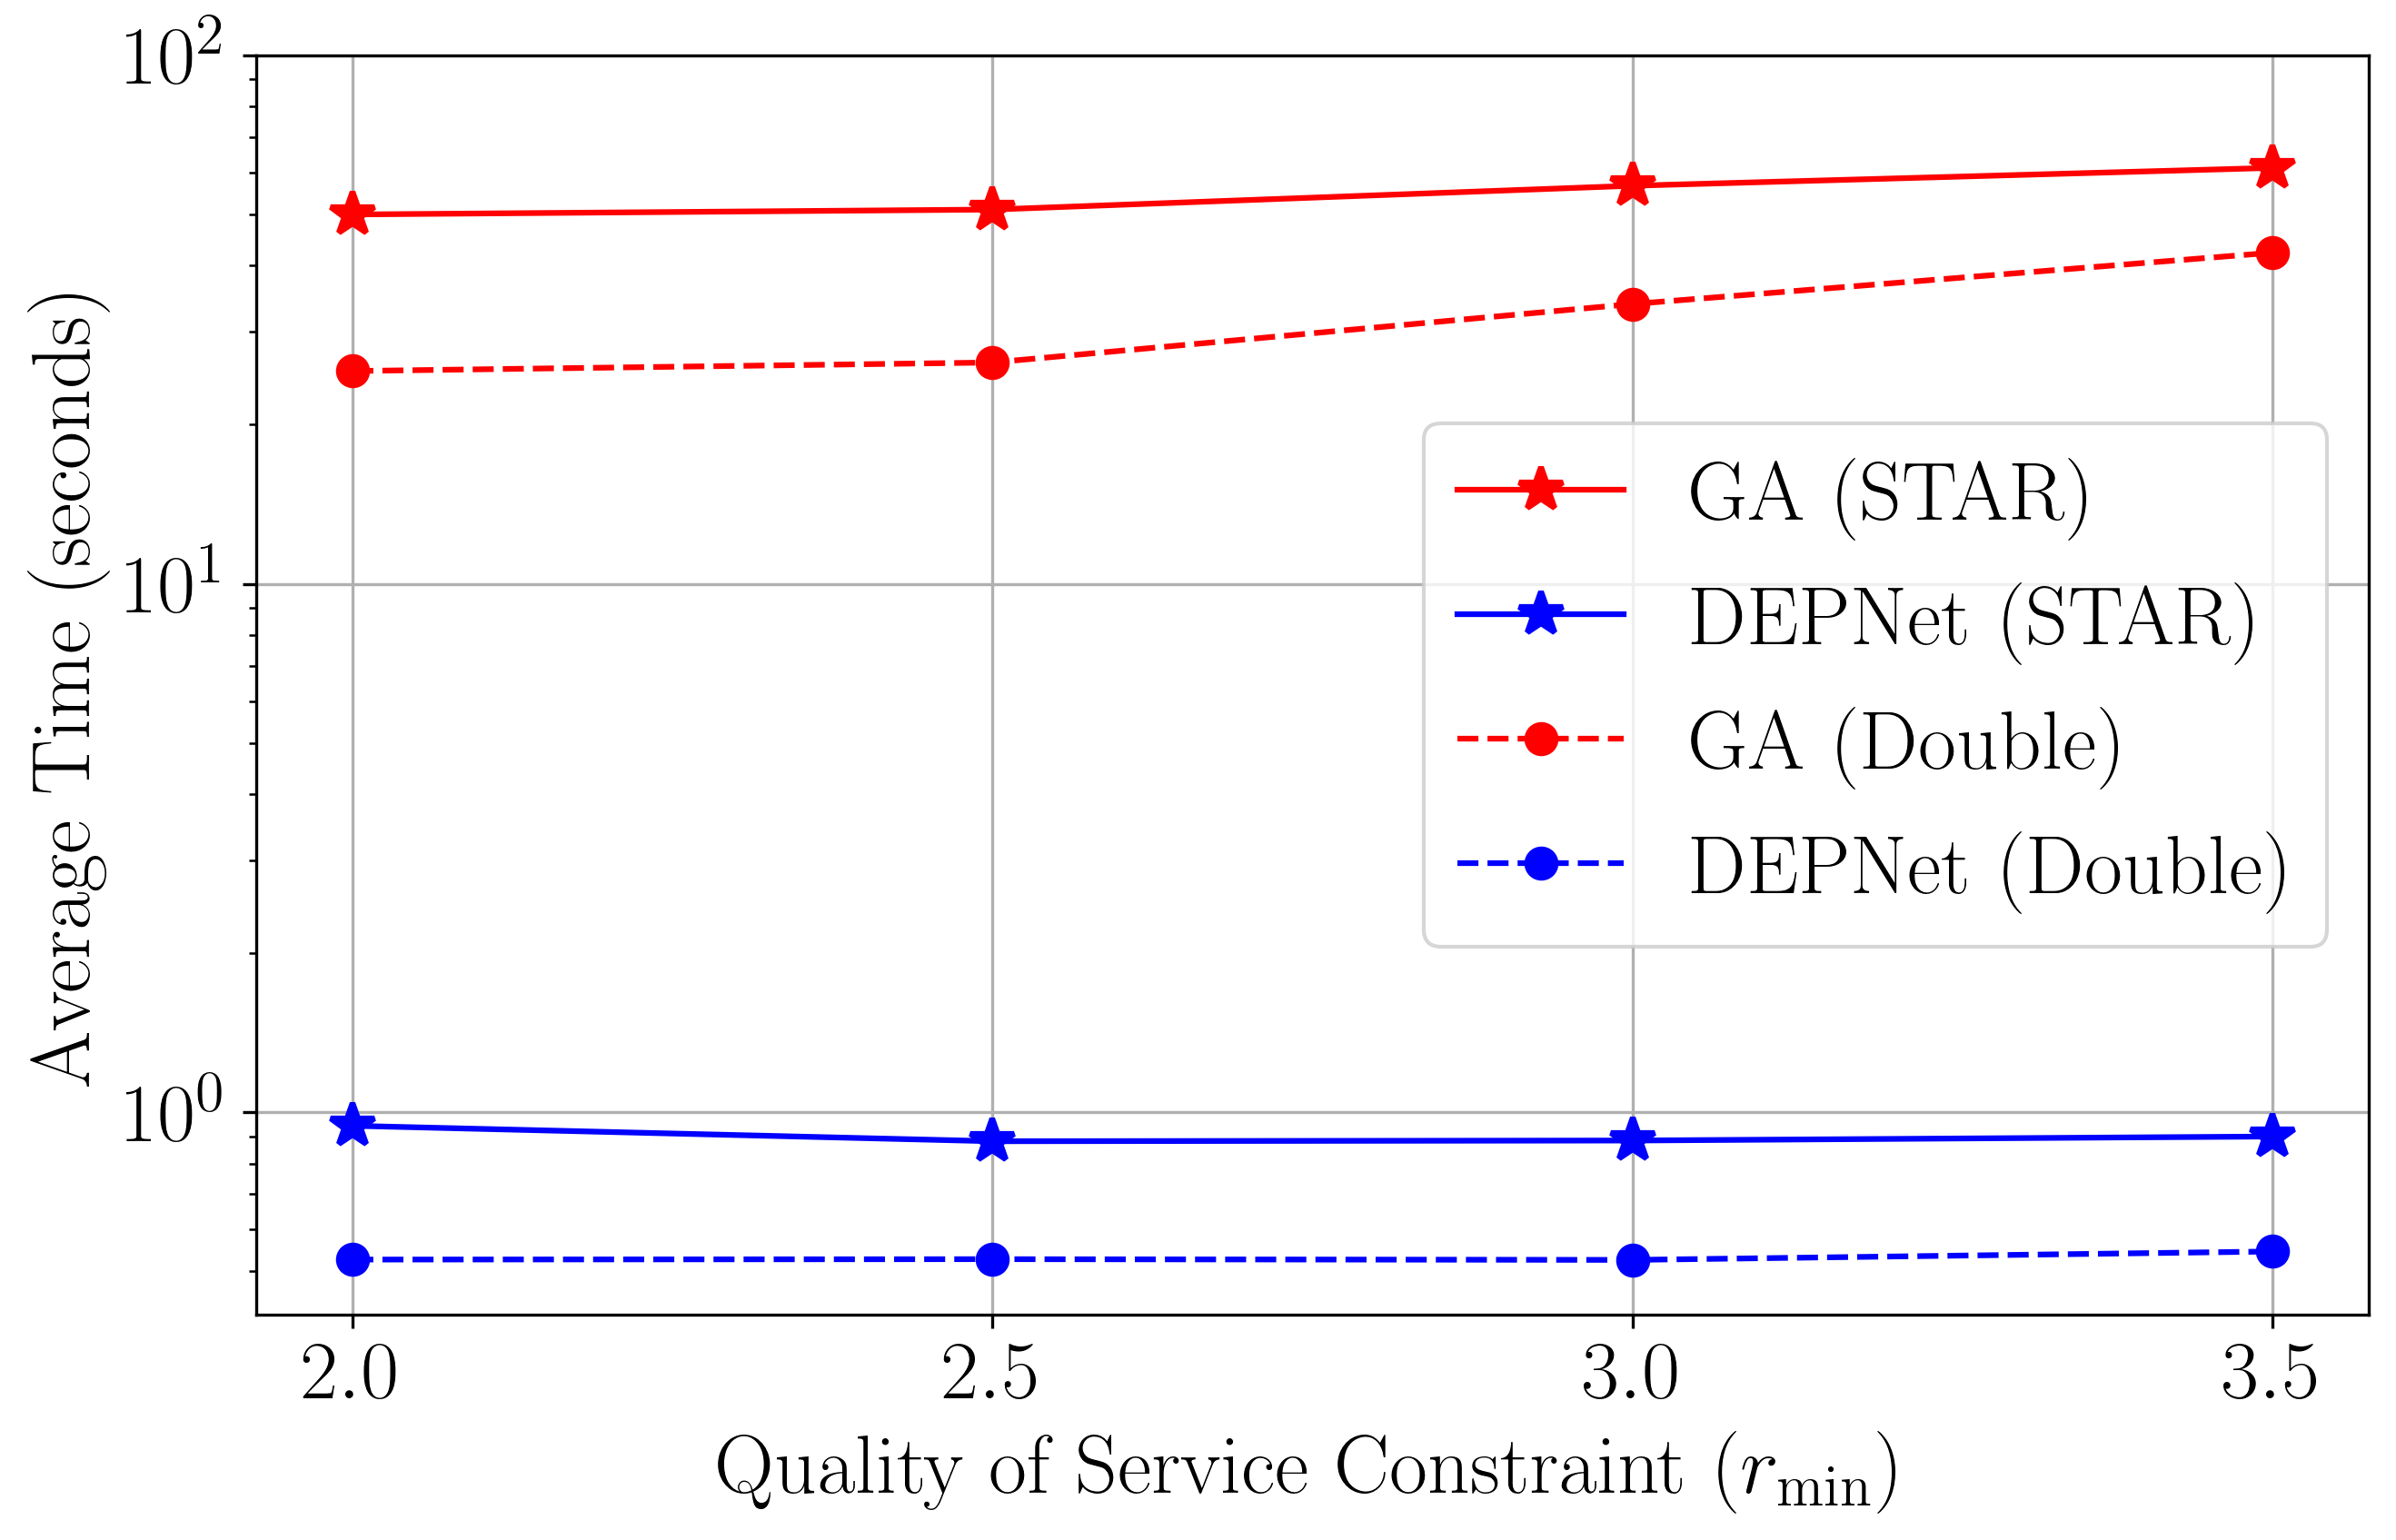

In [5]:
x_values = [2, 2.5, 3, 3.5]
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

# Get average time for each r_min
DEPNet_star = [np.mean([dnn_time_500[str(dataset)][mode[0]][0] for dataset in datasets]) for _, datasets in dataset_ids.items()]
DEPNet_double = [np.mean([dnn_time_500[str(dataset)][mode[1]][0] for dataset in datasets]) for _, datasets in dataset_ids.items()]
GA_star = [np.mean([ga[str(dataset)][mode[0]]["time"] for dataset in datasets]) for _, datasets in dataset_ids.items()]
GA_double = [np.mean([ga[str(dataset)][mode[1]]["time"] for dataset in datasets]) for _, datasets in dataset_ids.items()]

# Create the plot
plt.figure(figsize=(10, 6), dpi=300)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)

# plt.title(f"Sum-Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
plt.xlabel('Quality of Service Constraint ($r_{{\\min}}$)', fontsize=22)
plt.ylabel('Average Time (seconds)', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  # for x-axis
plt.tick_params(axis='y', labelsize=22)  # for y-axis
plt.xticks(x_values)
plt.yscale('log')
plt.yticks([10**0, 10**1, 10**2], ['\(10^0\)', '\(10^1\)', '\(10^2\)'])


# Show legend
plt.legend(fontsize=22)

# Show grid
plt.grid(True)

# Save plot
save_path_pc = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\new_time.png"
save_path_mac = f"/Users/xaviermootoo/Documents/VScode/star-ris-depnet/New_Plots/500_iter/new_time.png"
plt.savefig(save_path_mac, dpi=300)

# Display the plot
plt.show()
plt.close()

### Sumrate over $r_{\text{min}}$ Plot for $P_{\text{max}}=3$

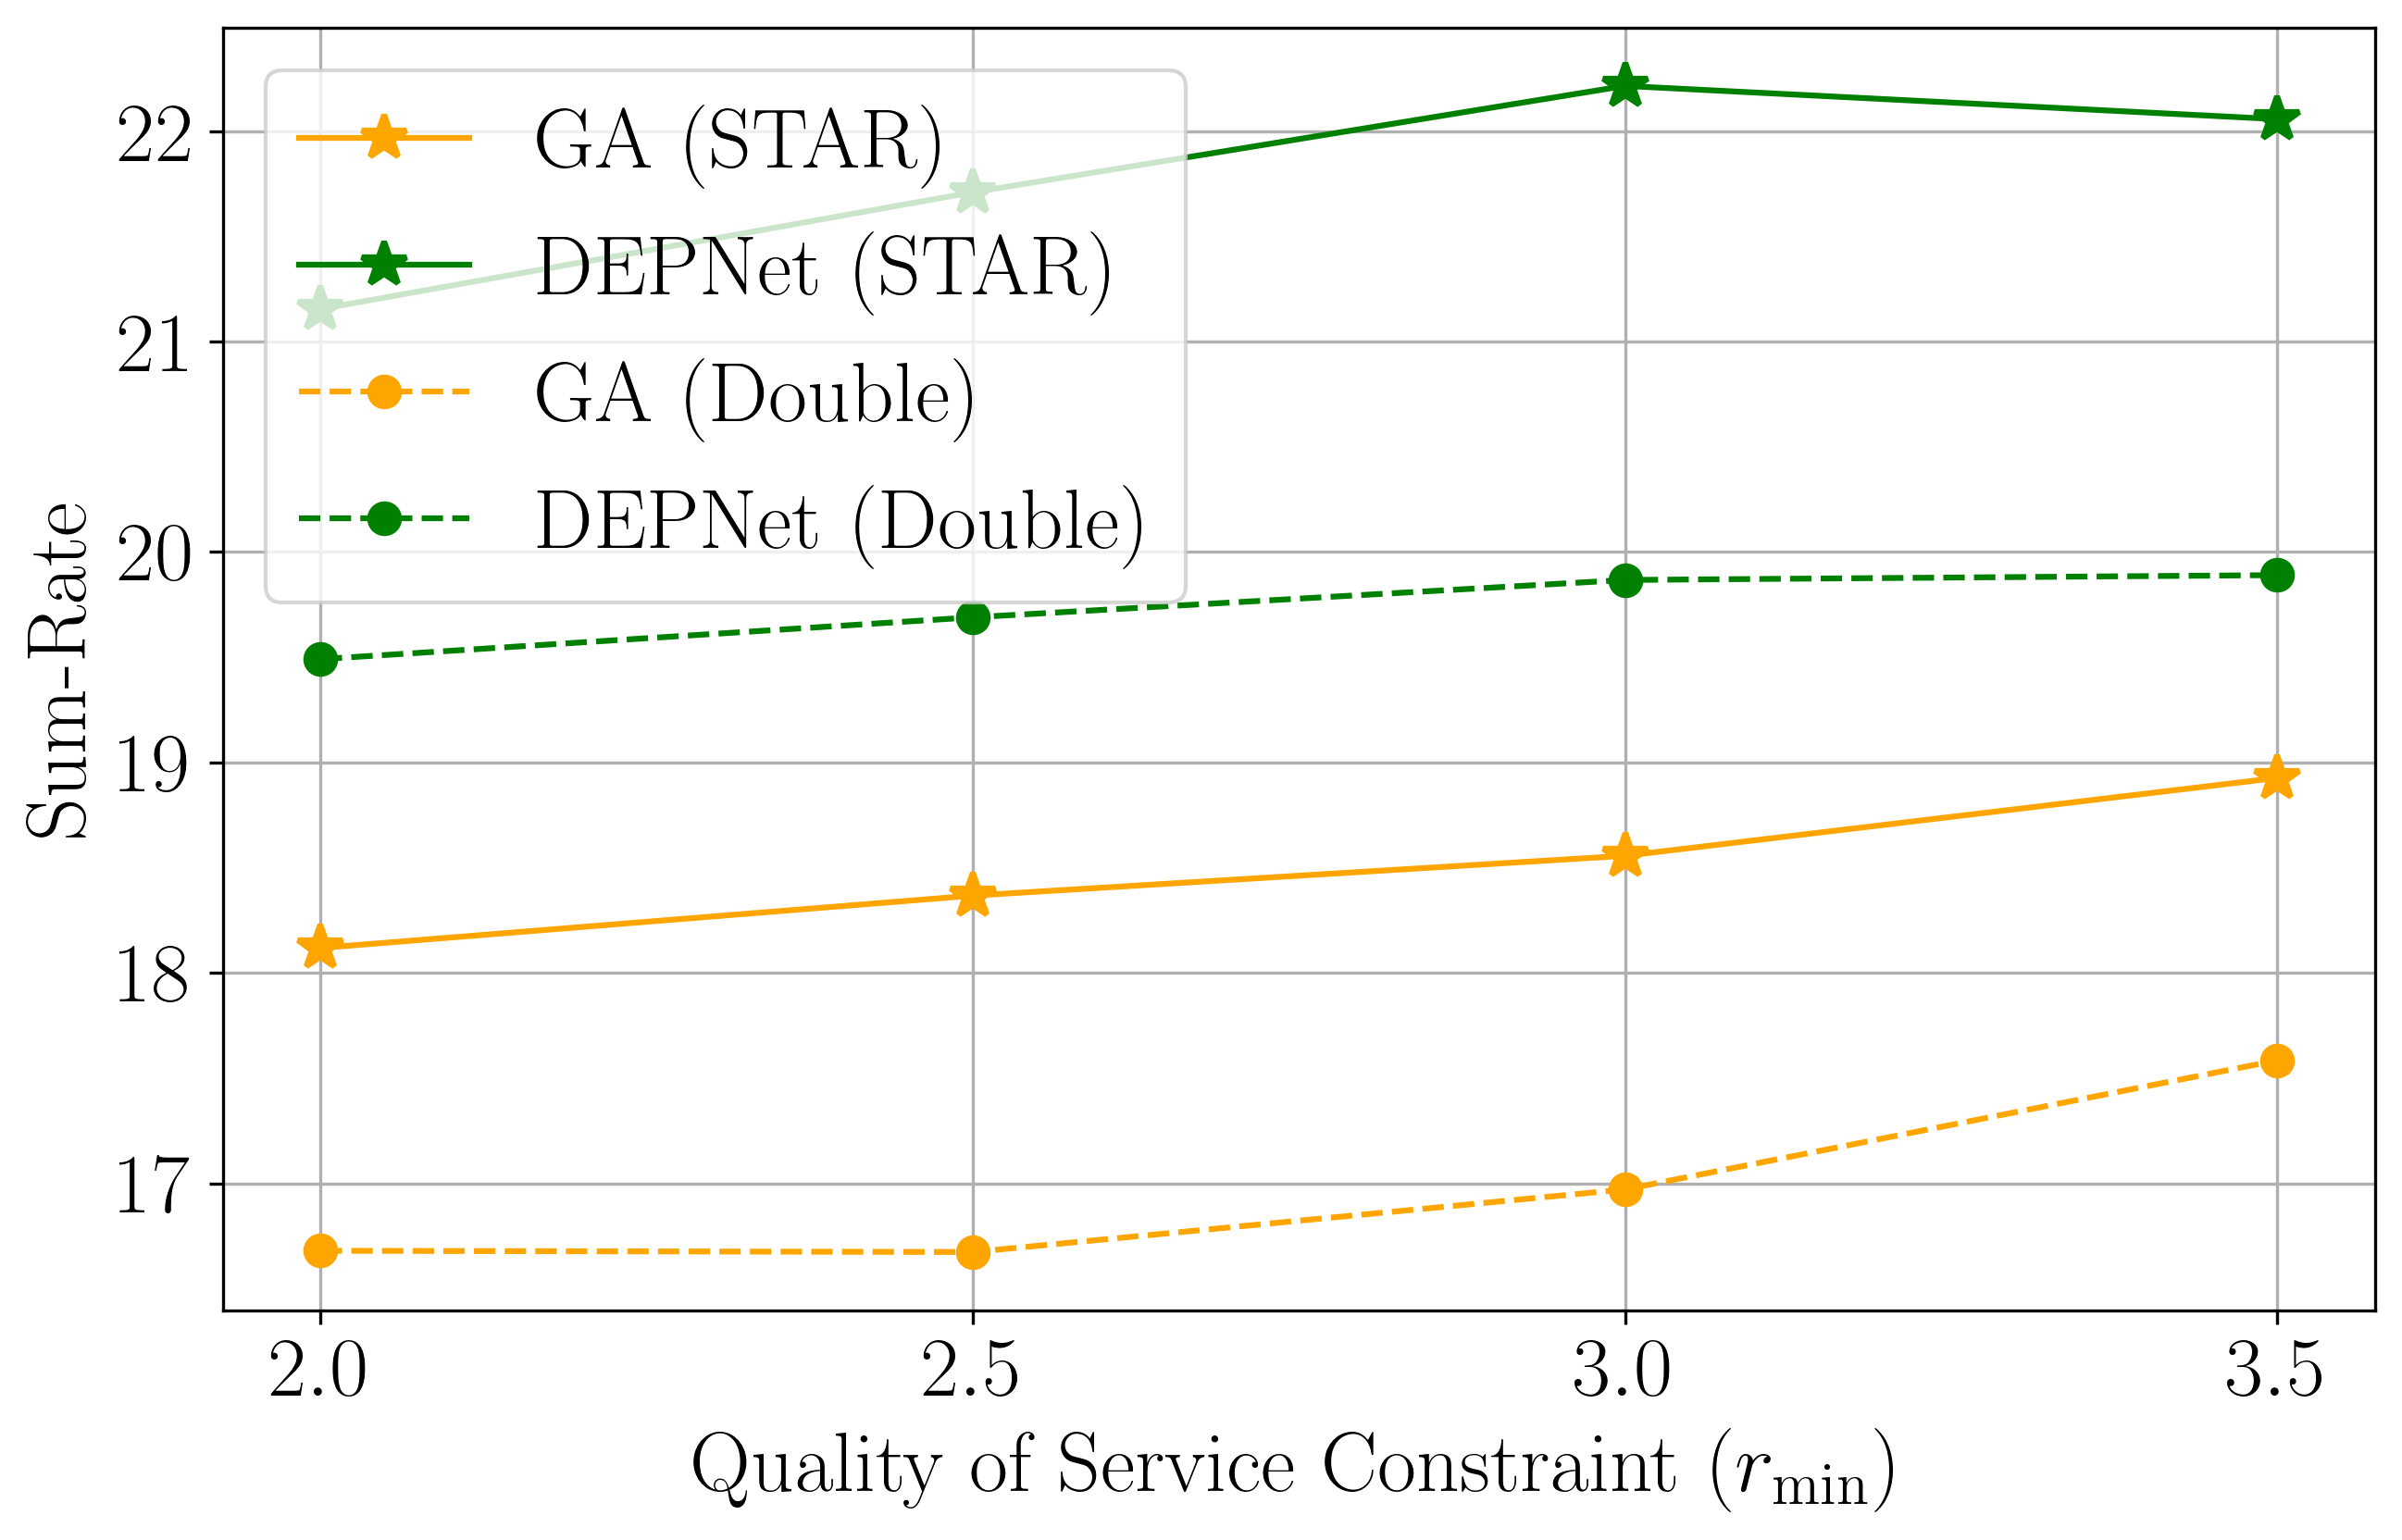

In [49]:
r_mins = [2, 2.5, 3, 3.5]
x_values = r_mins
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}
new_dataset_ids = [dataset_ids[r_min][2] for r_min in r_mins]

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})


# Get the dataset ids for the r_min value
datasets = new_dataset_ids

# Get the data
DEPNet_star = [dnn_res_500[str(dataset)][mode[0]][0] for dataset in datasets]
DEPNet_double = [dnn_res_500[str(dataset)][mode[1]][0] for dataset in datasets]
GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]

# Create the plot
plt.figure(figsize=(10, 6), dpi=300)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_star, marker='*', linestyle='-', color='orange', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='green', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_double, marker='o', linestyle='--', color='orange', label='GA (Double)', markersize=8)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='green', label='DEPNet (Double)', markersize=8)

# plt.title(f"Sum-Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
plt.xlabel('Quality of Service Constraint ($r_{\\min}$)', fontsize=22)
plt.ylabel('Sum-Rate', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  # for x-axis
plt.tick_params(axis='y', labelsize=22)  # for y-axis
plt.xticks(x_values)

# Show legend
plt.legend(fontsize=22)

# Show grid
plt.grid(True)

# Save plot
save_path_pc = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\p_max_3.png"
save_path_mac = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/New_Plots/500_iter/p_max_3.png"
plt.savefig(save_path_mac, dpi=300)

# Display the plot
plt.show()
plt.close()


### 100 Iteration Plots

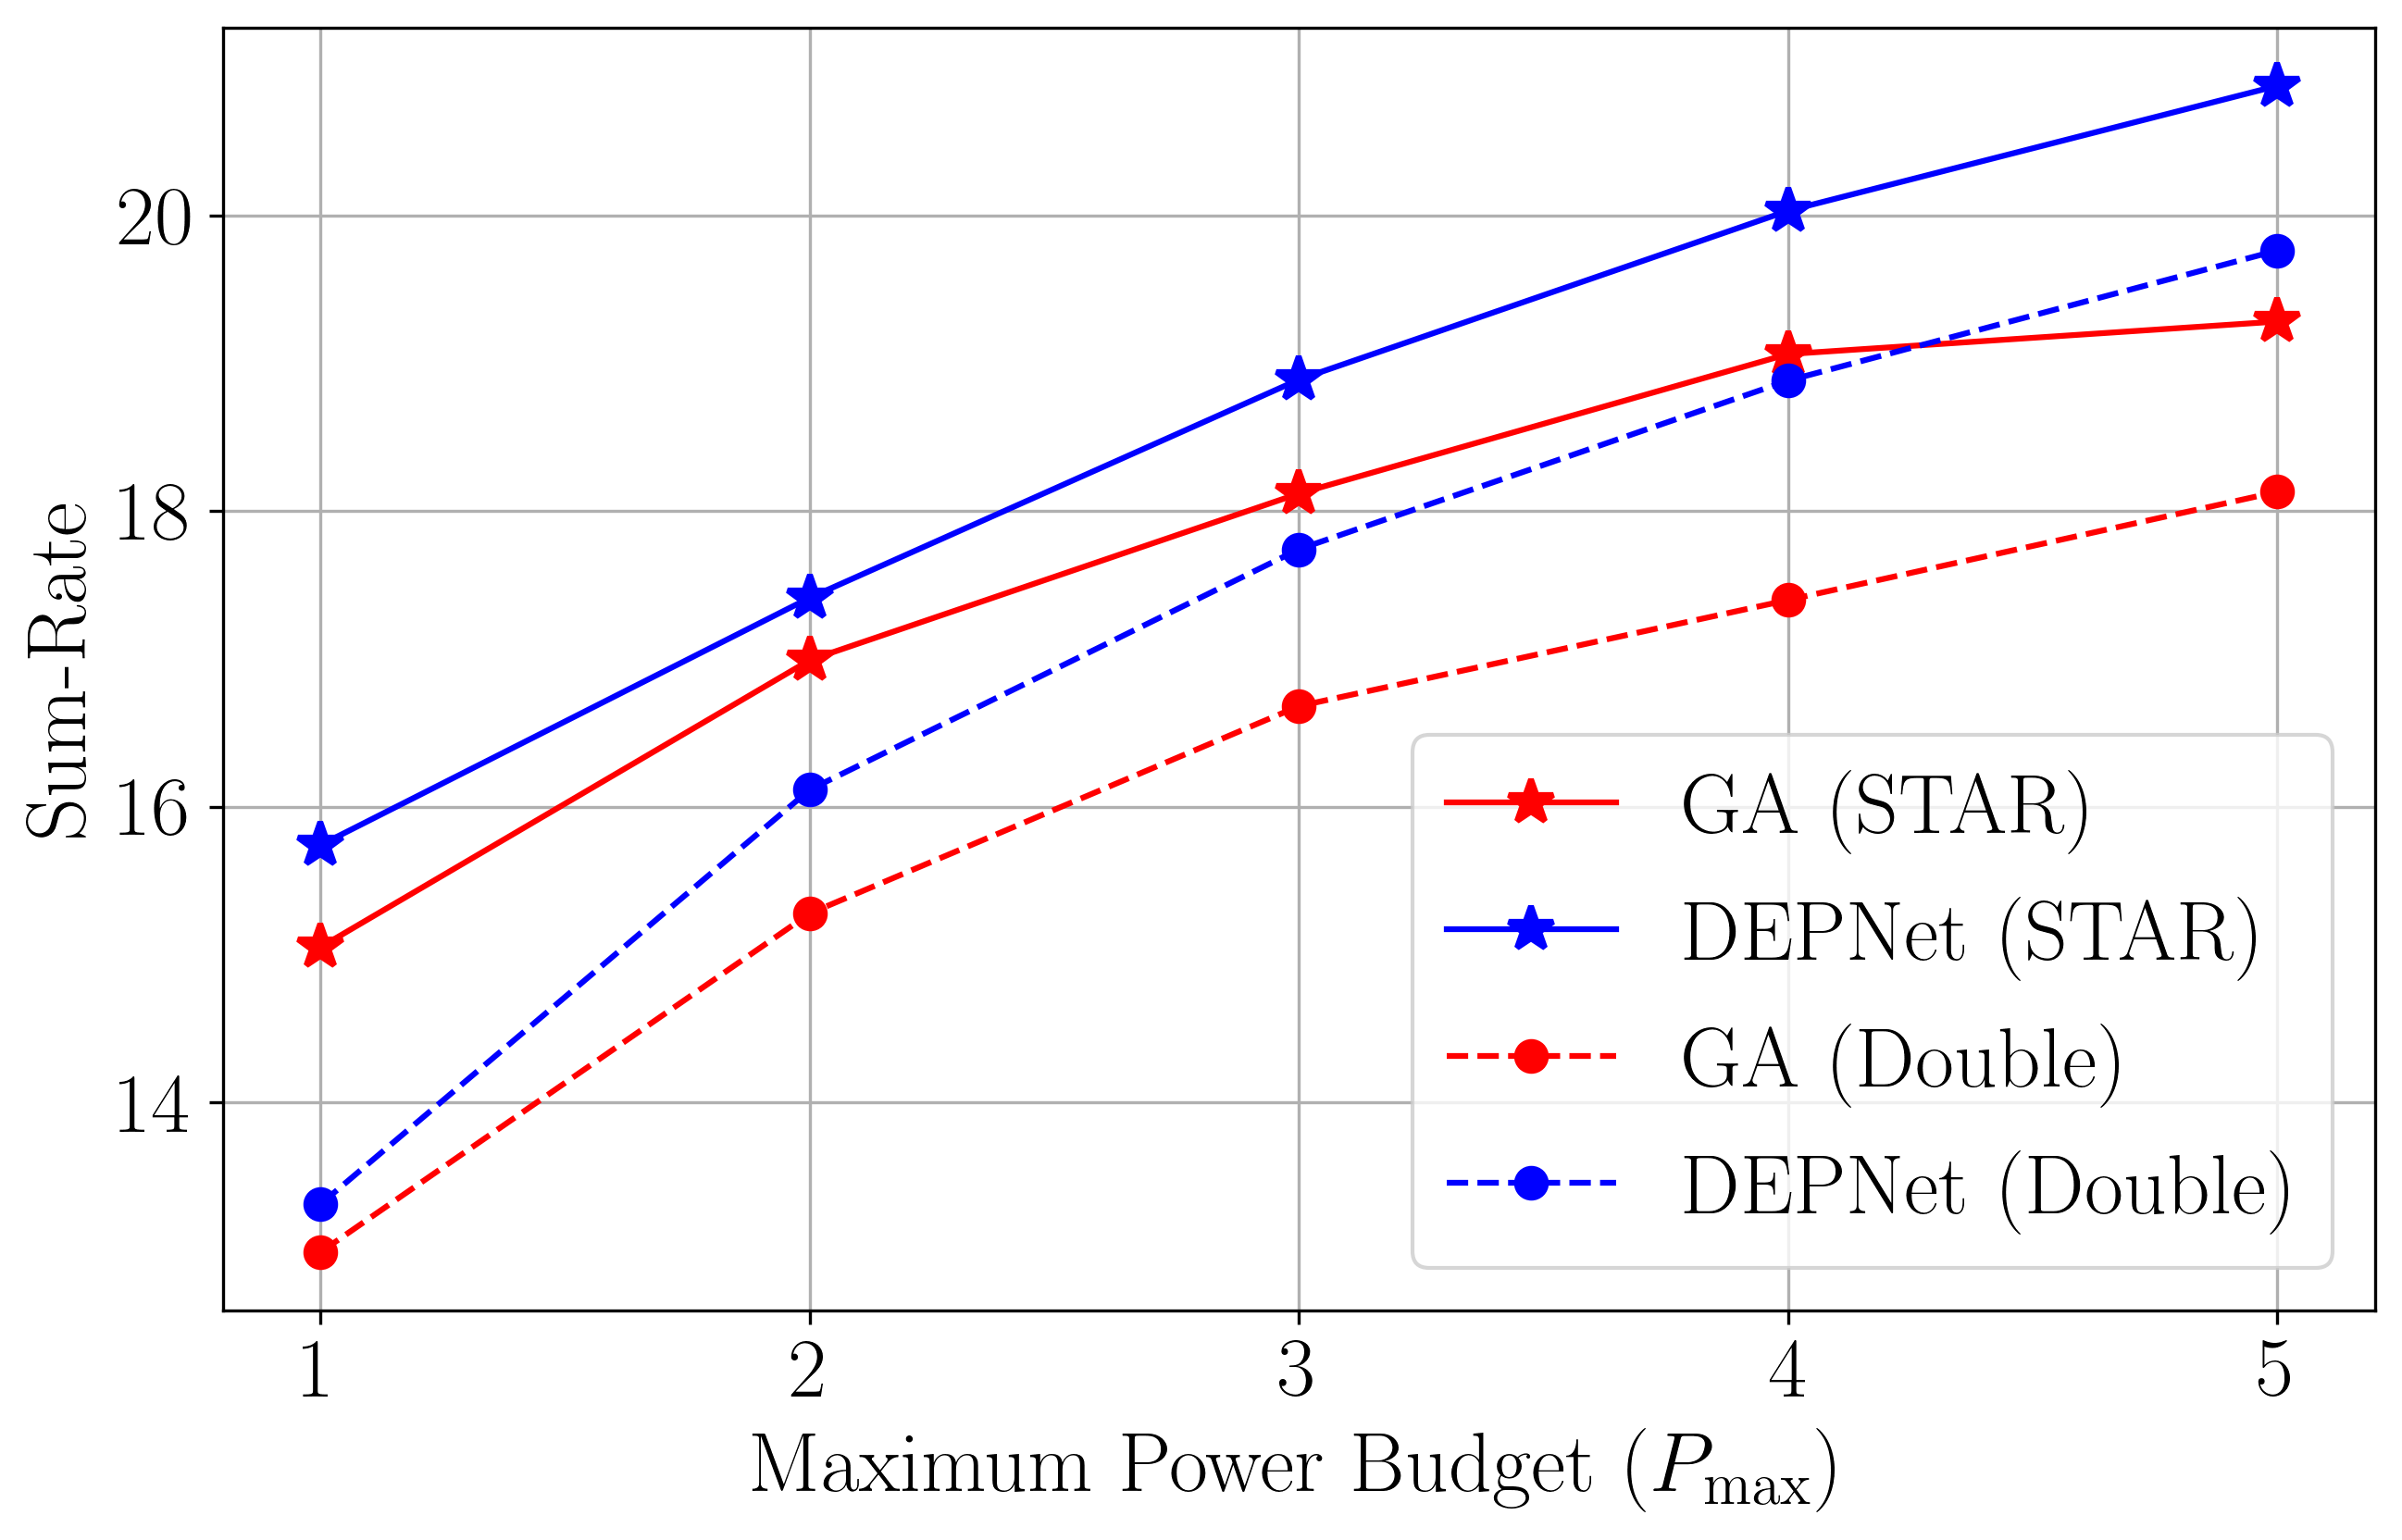

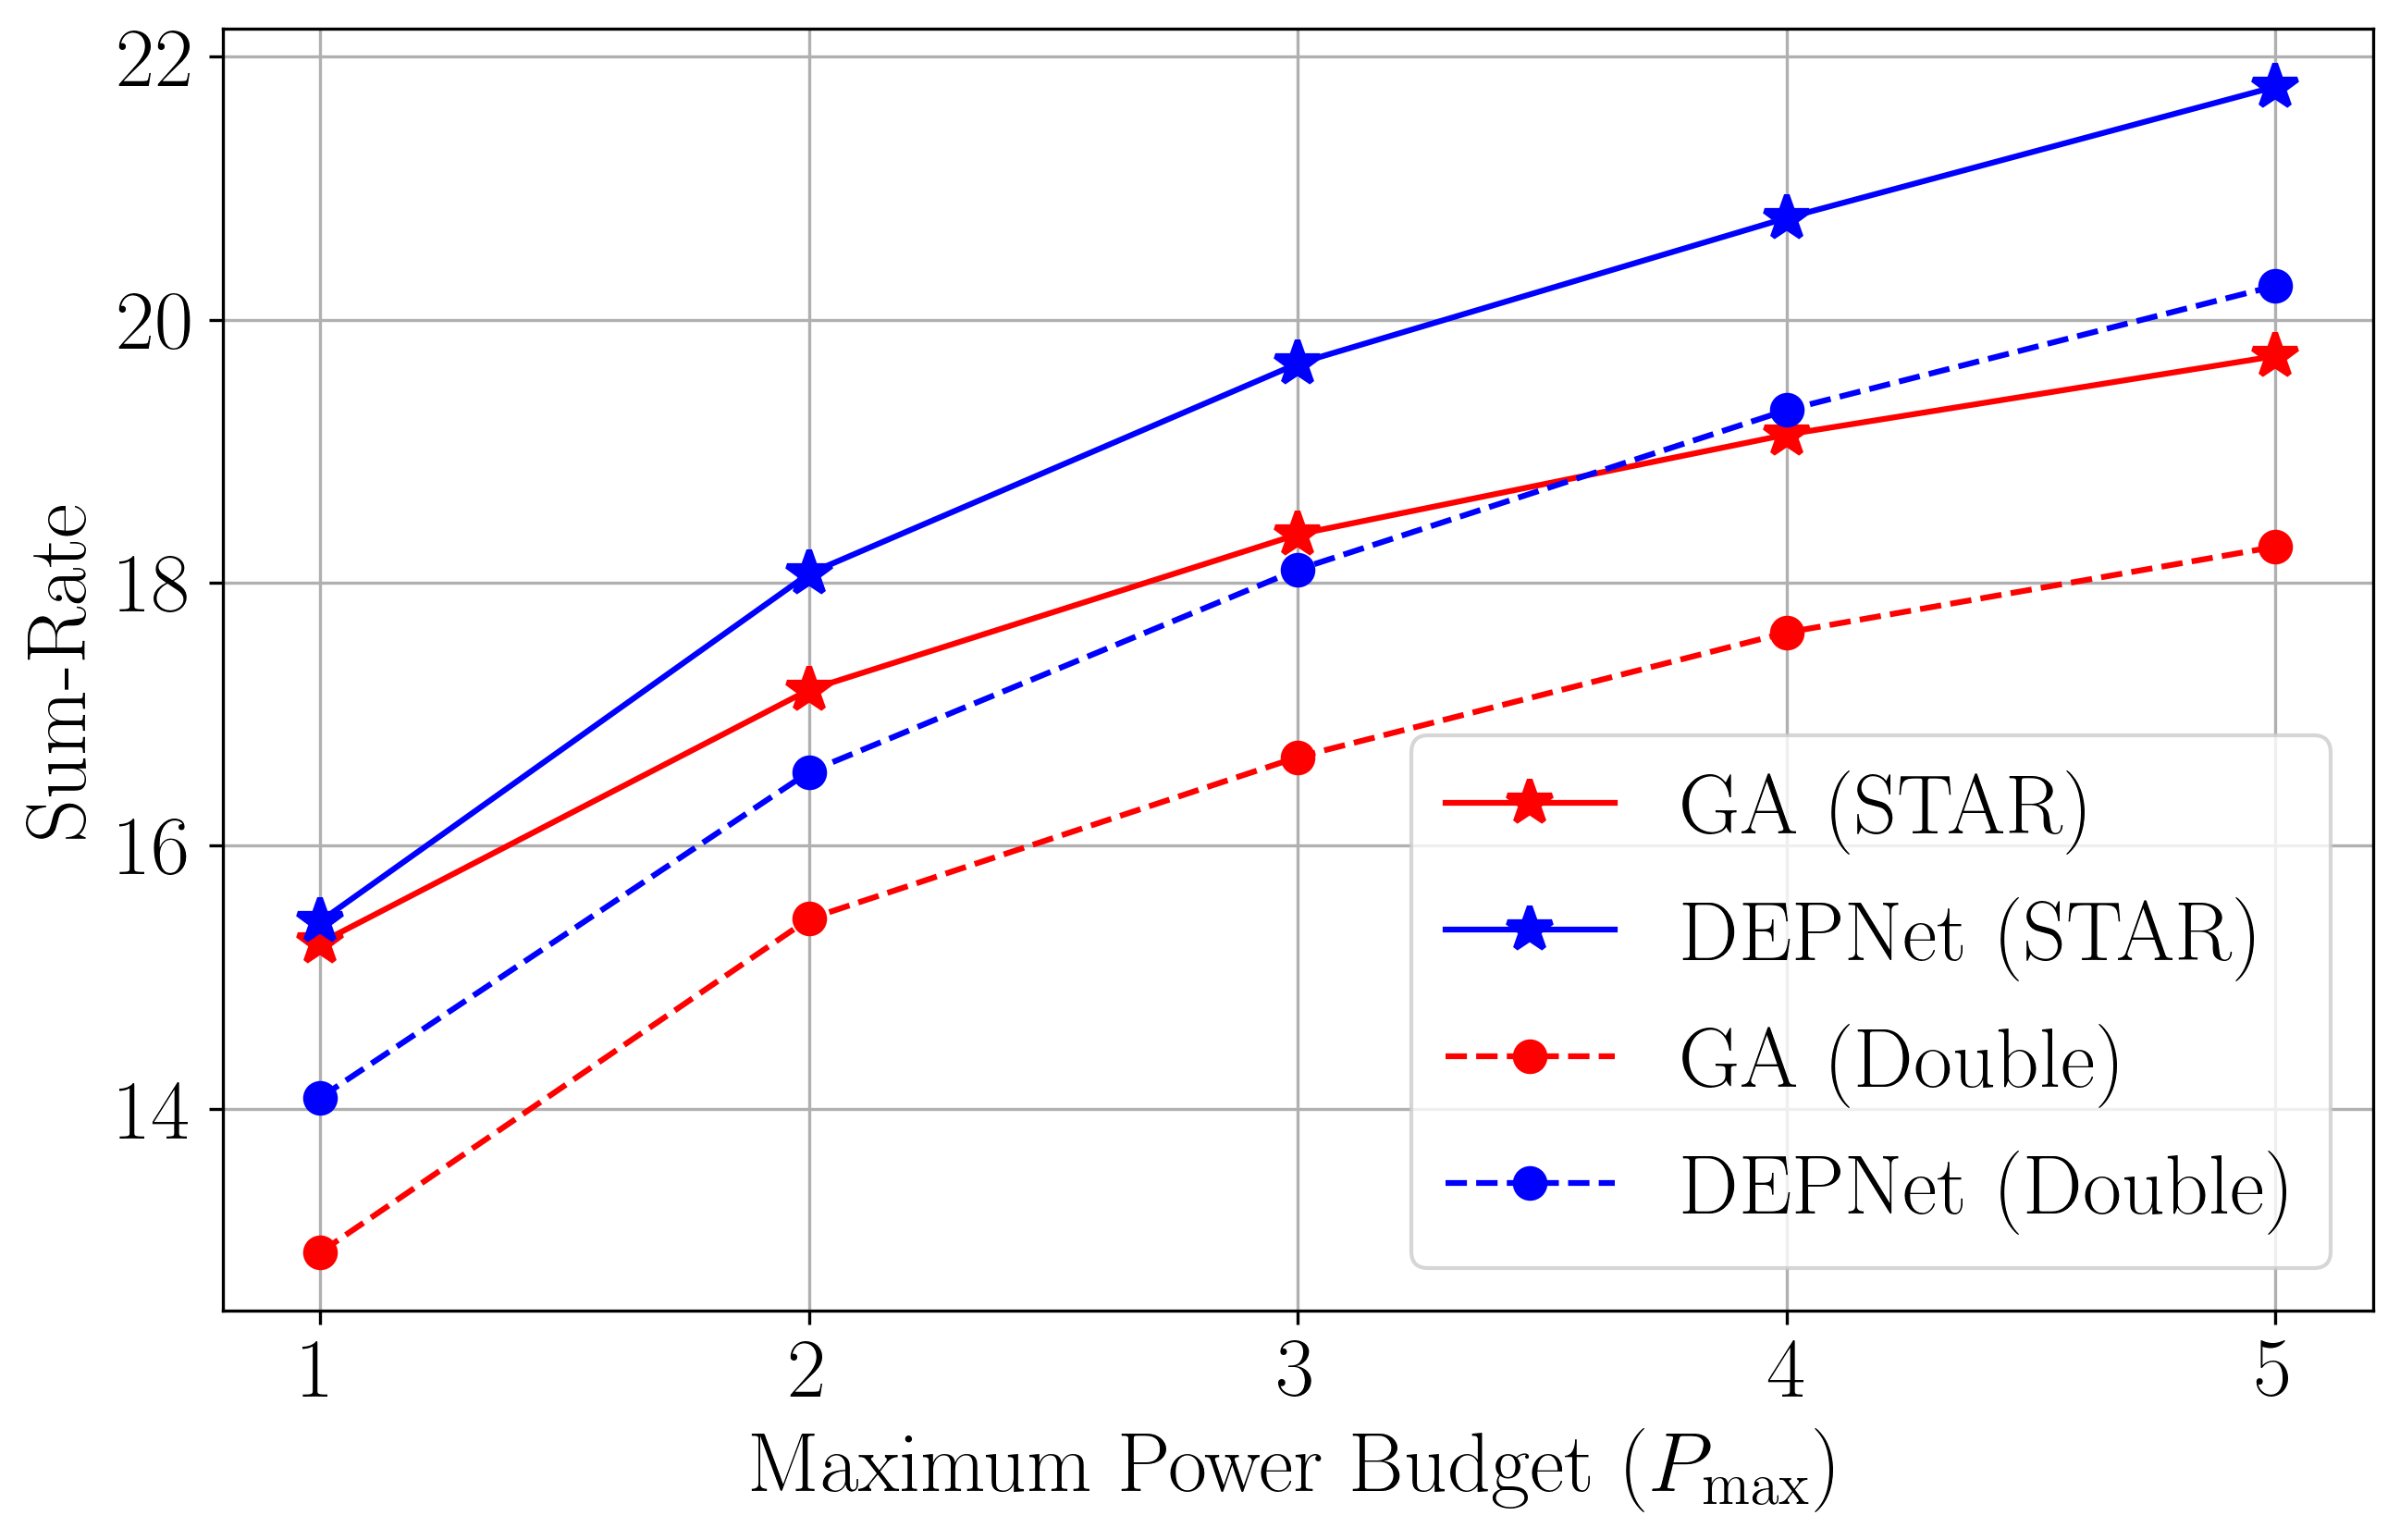

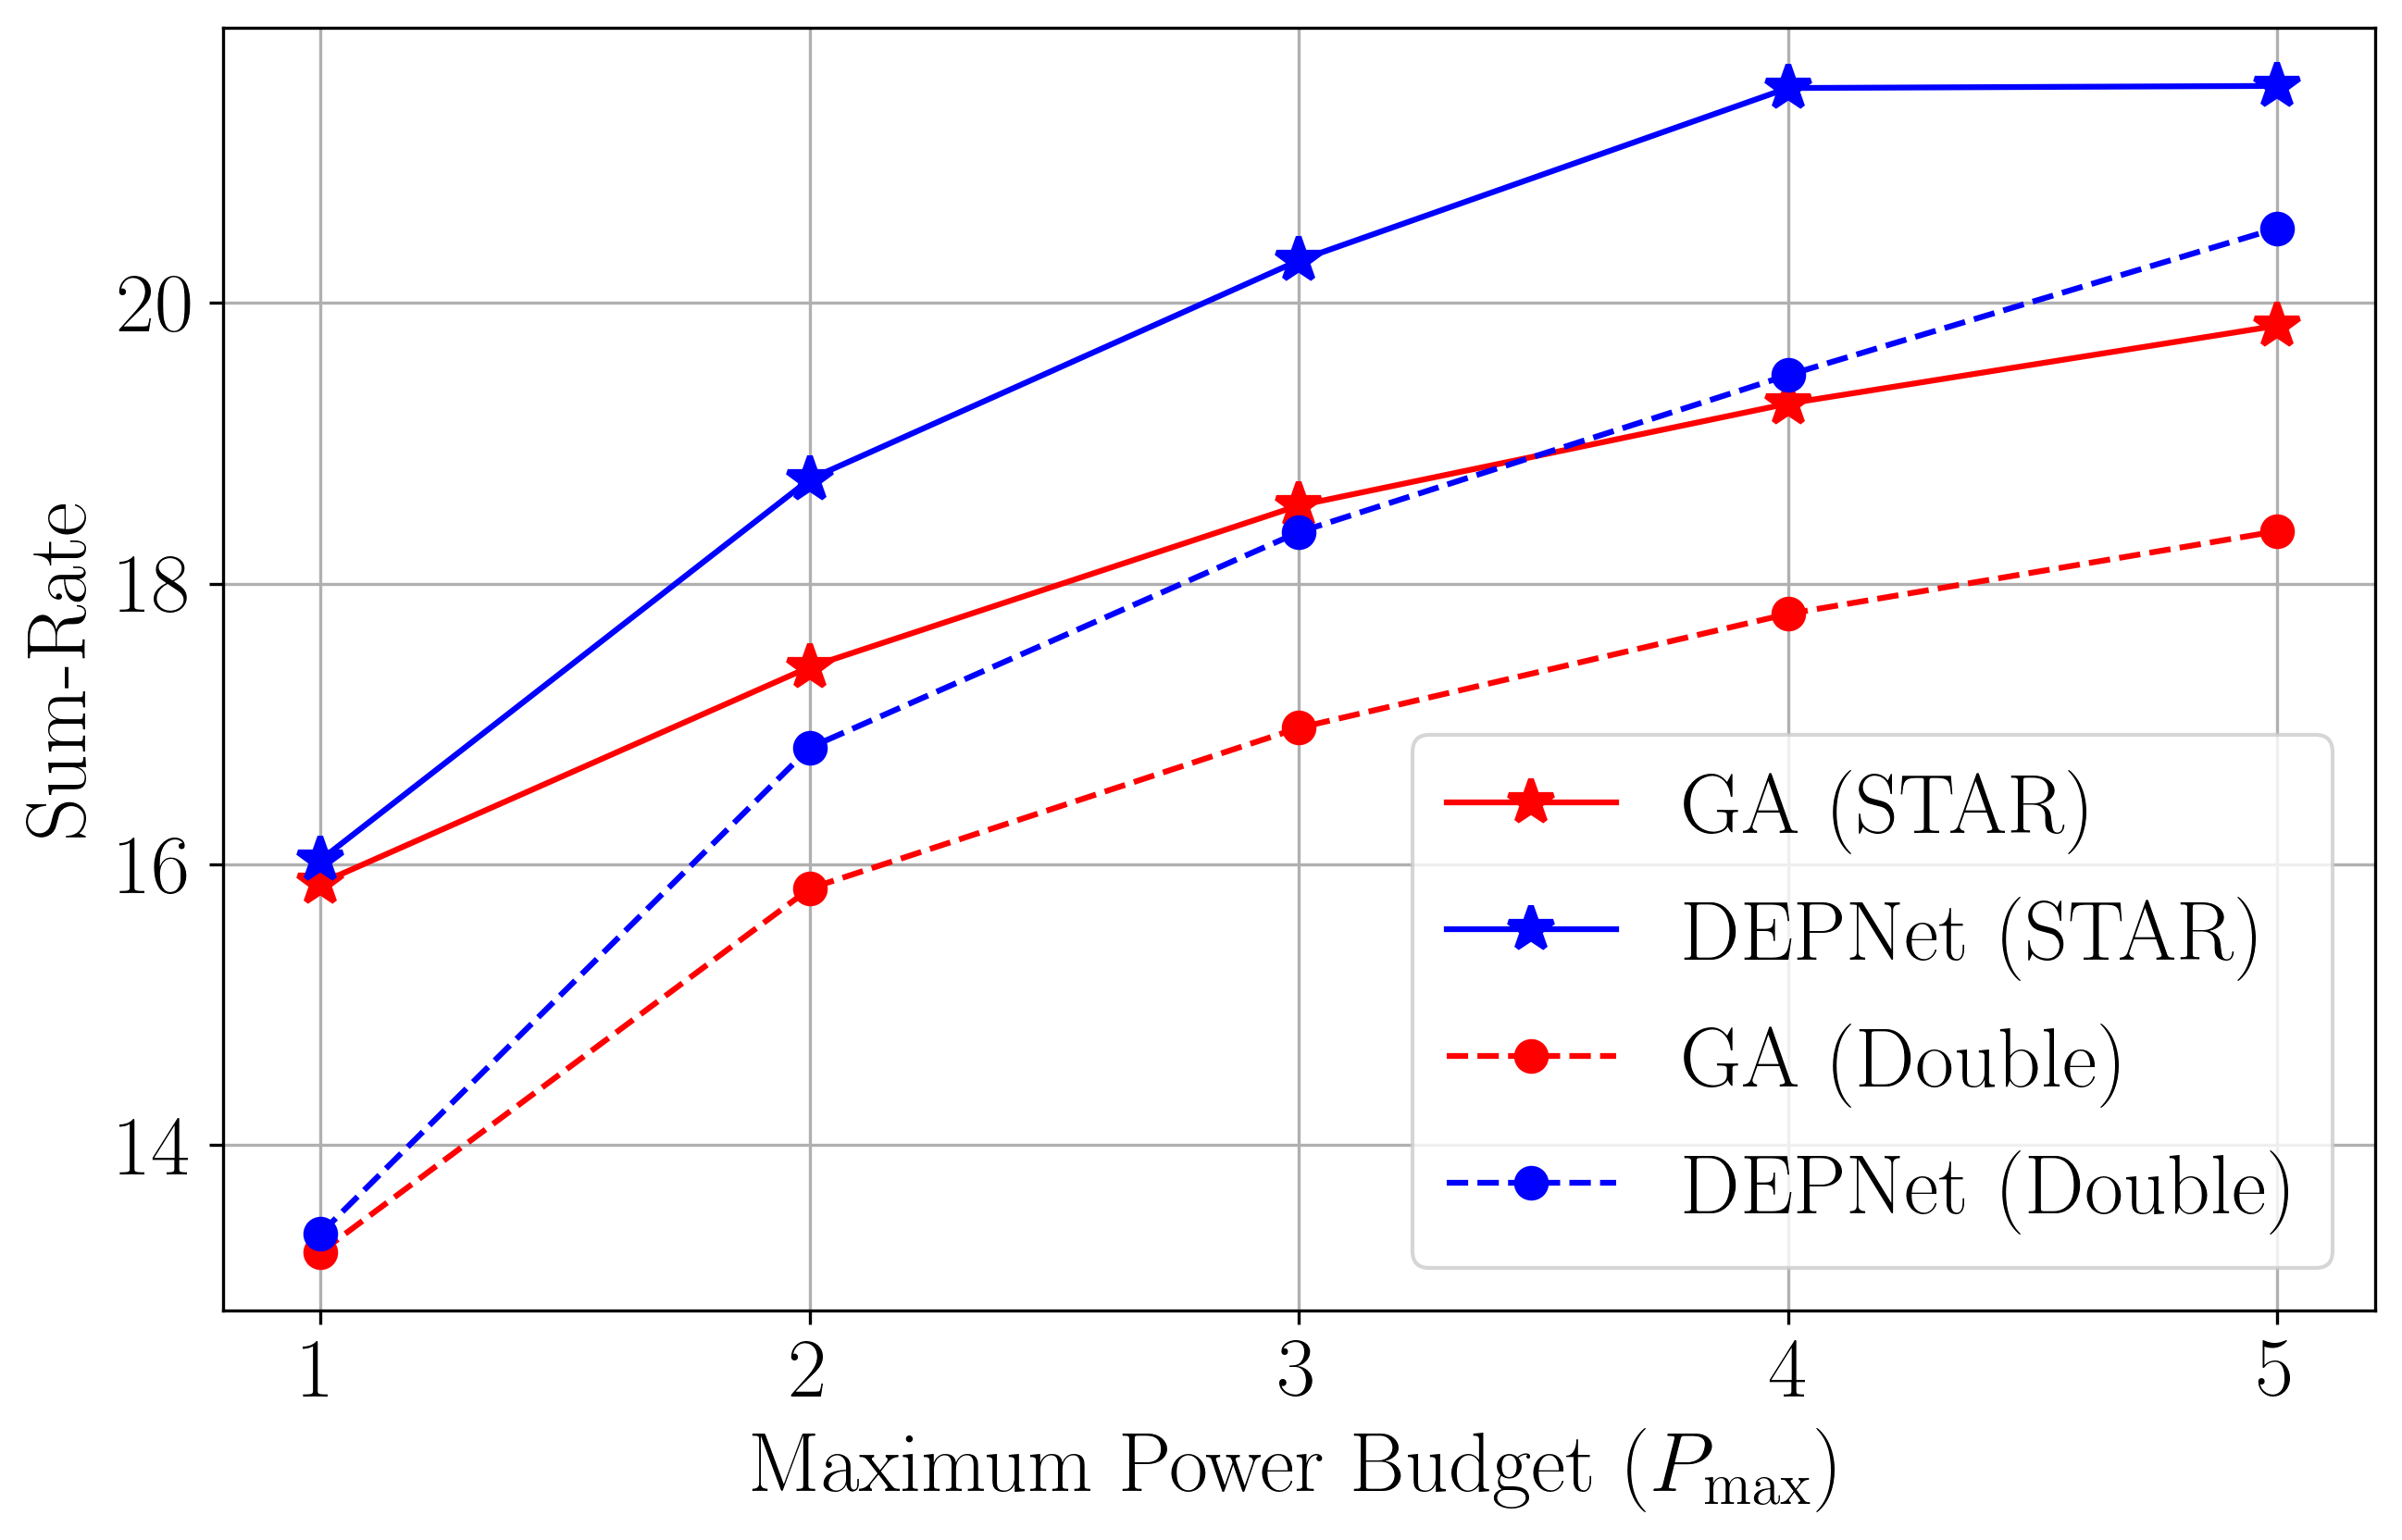

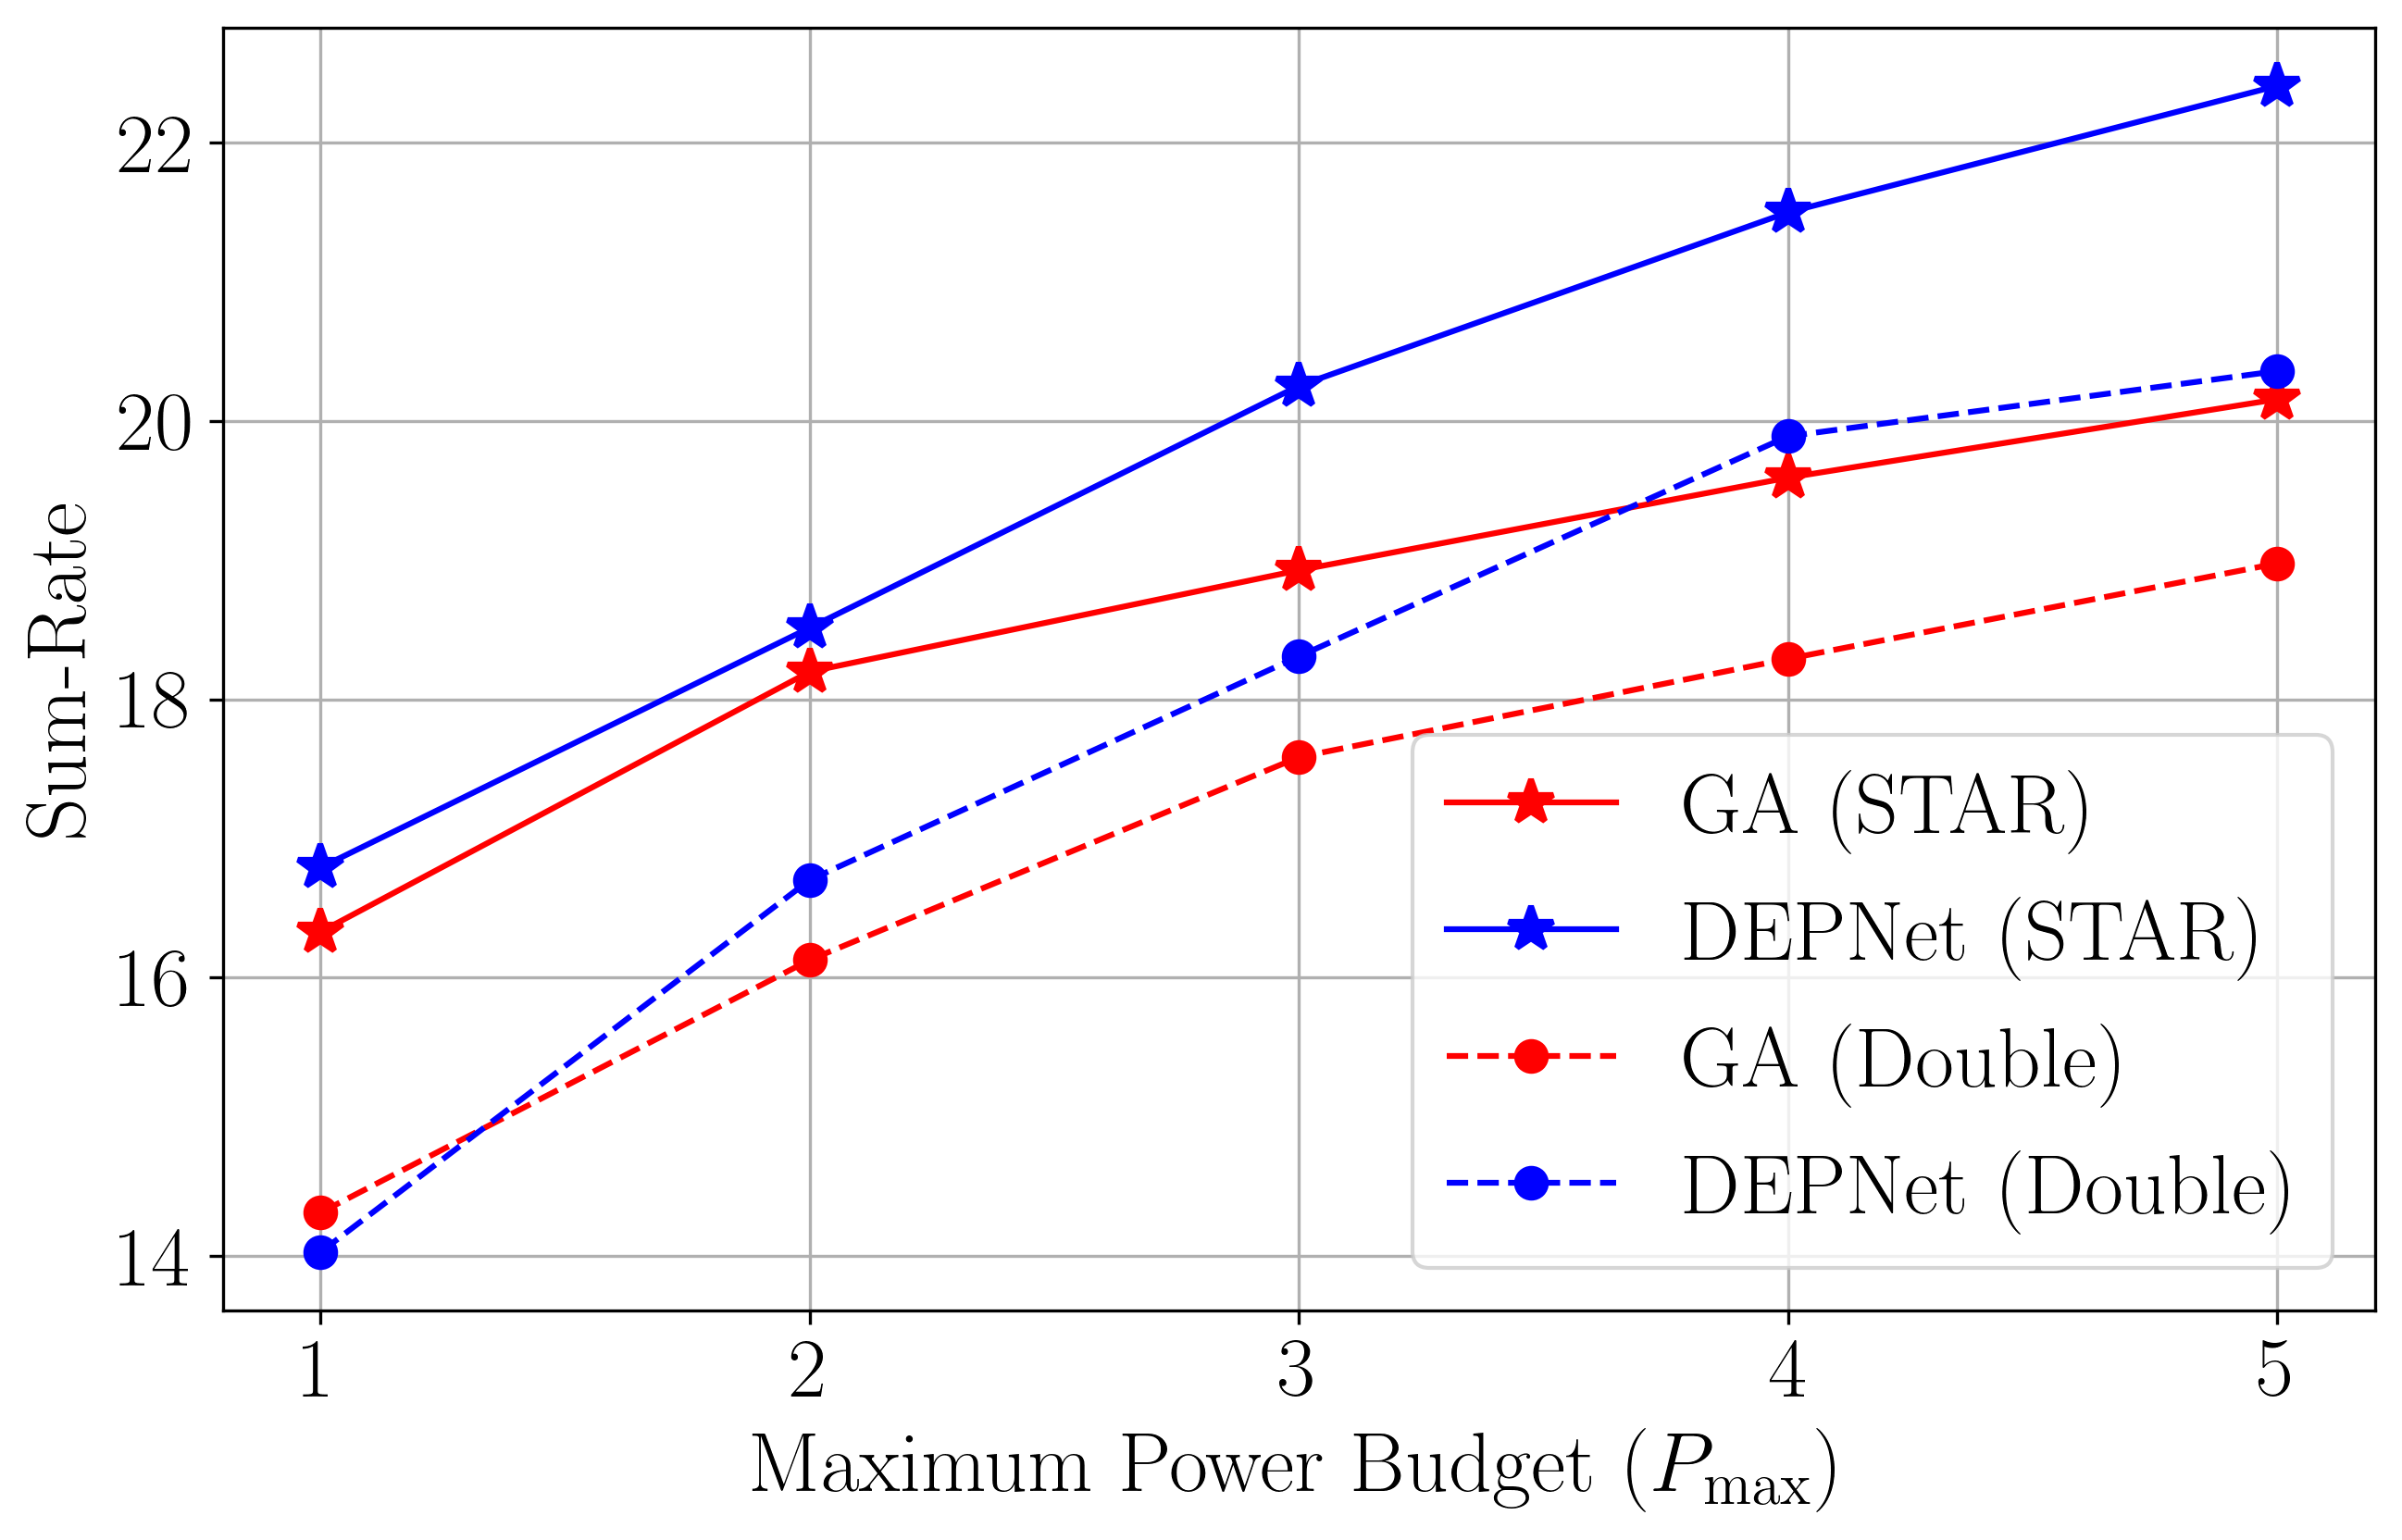

In [50]:
# Make a different graph for each r_min value and RIS mode (STAR, Double). 
# Plot P_max on the x-axis and sumrate on the y-axis, and a different line for GA and DEPNet.

# Data for two lines
x_values = range(1, 6)

r_mins = [2, 2.5, 3, 3.5]
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

for r_min in r_mins:
    
    # Get the dataset ids for the r_min value
    datasets = dataset_ids[r_min]
    
    # Get the data
    DEPNet_star = [dnn_res_100[str(dataset)][mode[0]][0] for dataset in datasets]
    DEPNet_double = [dnn_res_100[str(dataset)][mode[1]][0] for dataset in datasets]
    GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
    GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]
    
    # Create the plot
    plt.figure(figsize=(10, 6), dpi=300)

    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)
    
    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)
    
    # plt.title(f"Sum-Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
    plt.xlabel('Maximum Power Budget ($P_{\\max}$)', fontsize=22)
    plt.ylabel('Sum-Rate', fontsize=22)
    plt.tick_params(axis='x', labelsize=22)  # for x-axis
    plt.tick_params(axis='y', labelsize=22)  # for y-axis

    # Show legend
    plt.legend(fontsize=22)

    # Show grid
    plt.grid(True)

    # Save plot
    save_path_pc = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\100_iter\\{r_min}.png"
    save_path_mac = f"/Users/xaviermootoo/Documents/VScode/star-ris-depnet/New_Plots/100_iter/{r_min}.png"
    plt.savefig(save_path_mac, dpi=300)
    
    # Display the plot
    plt.show()
    plt.close()


### 500 Iteration Plots

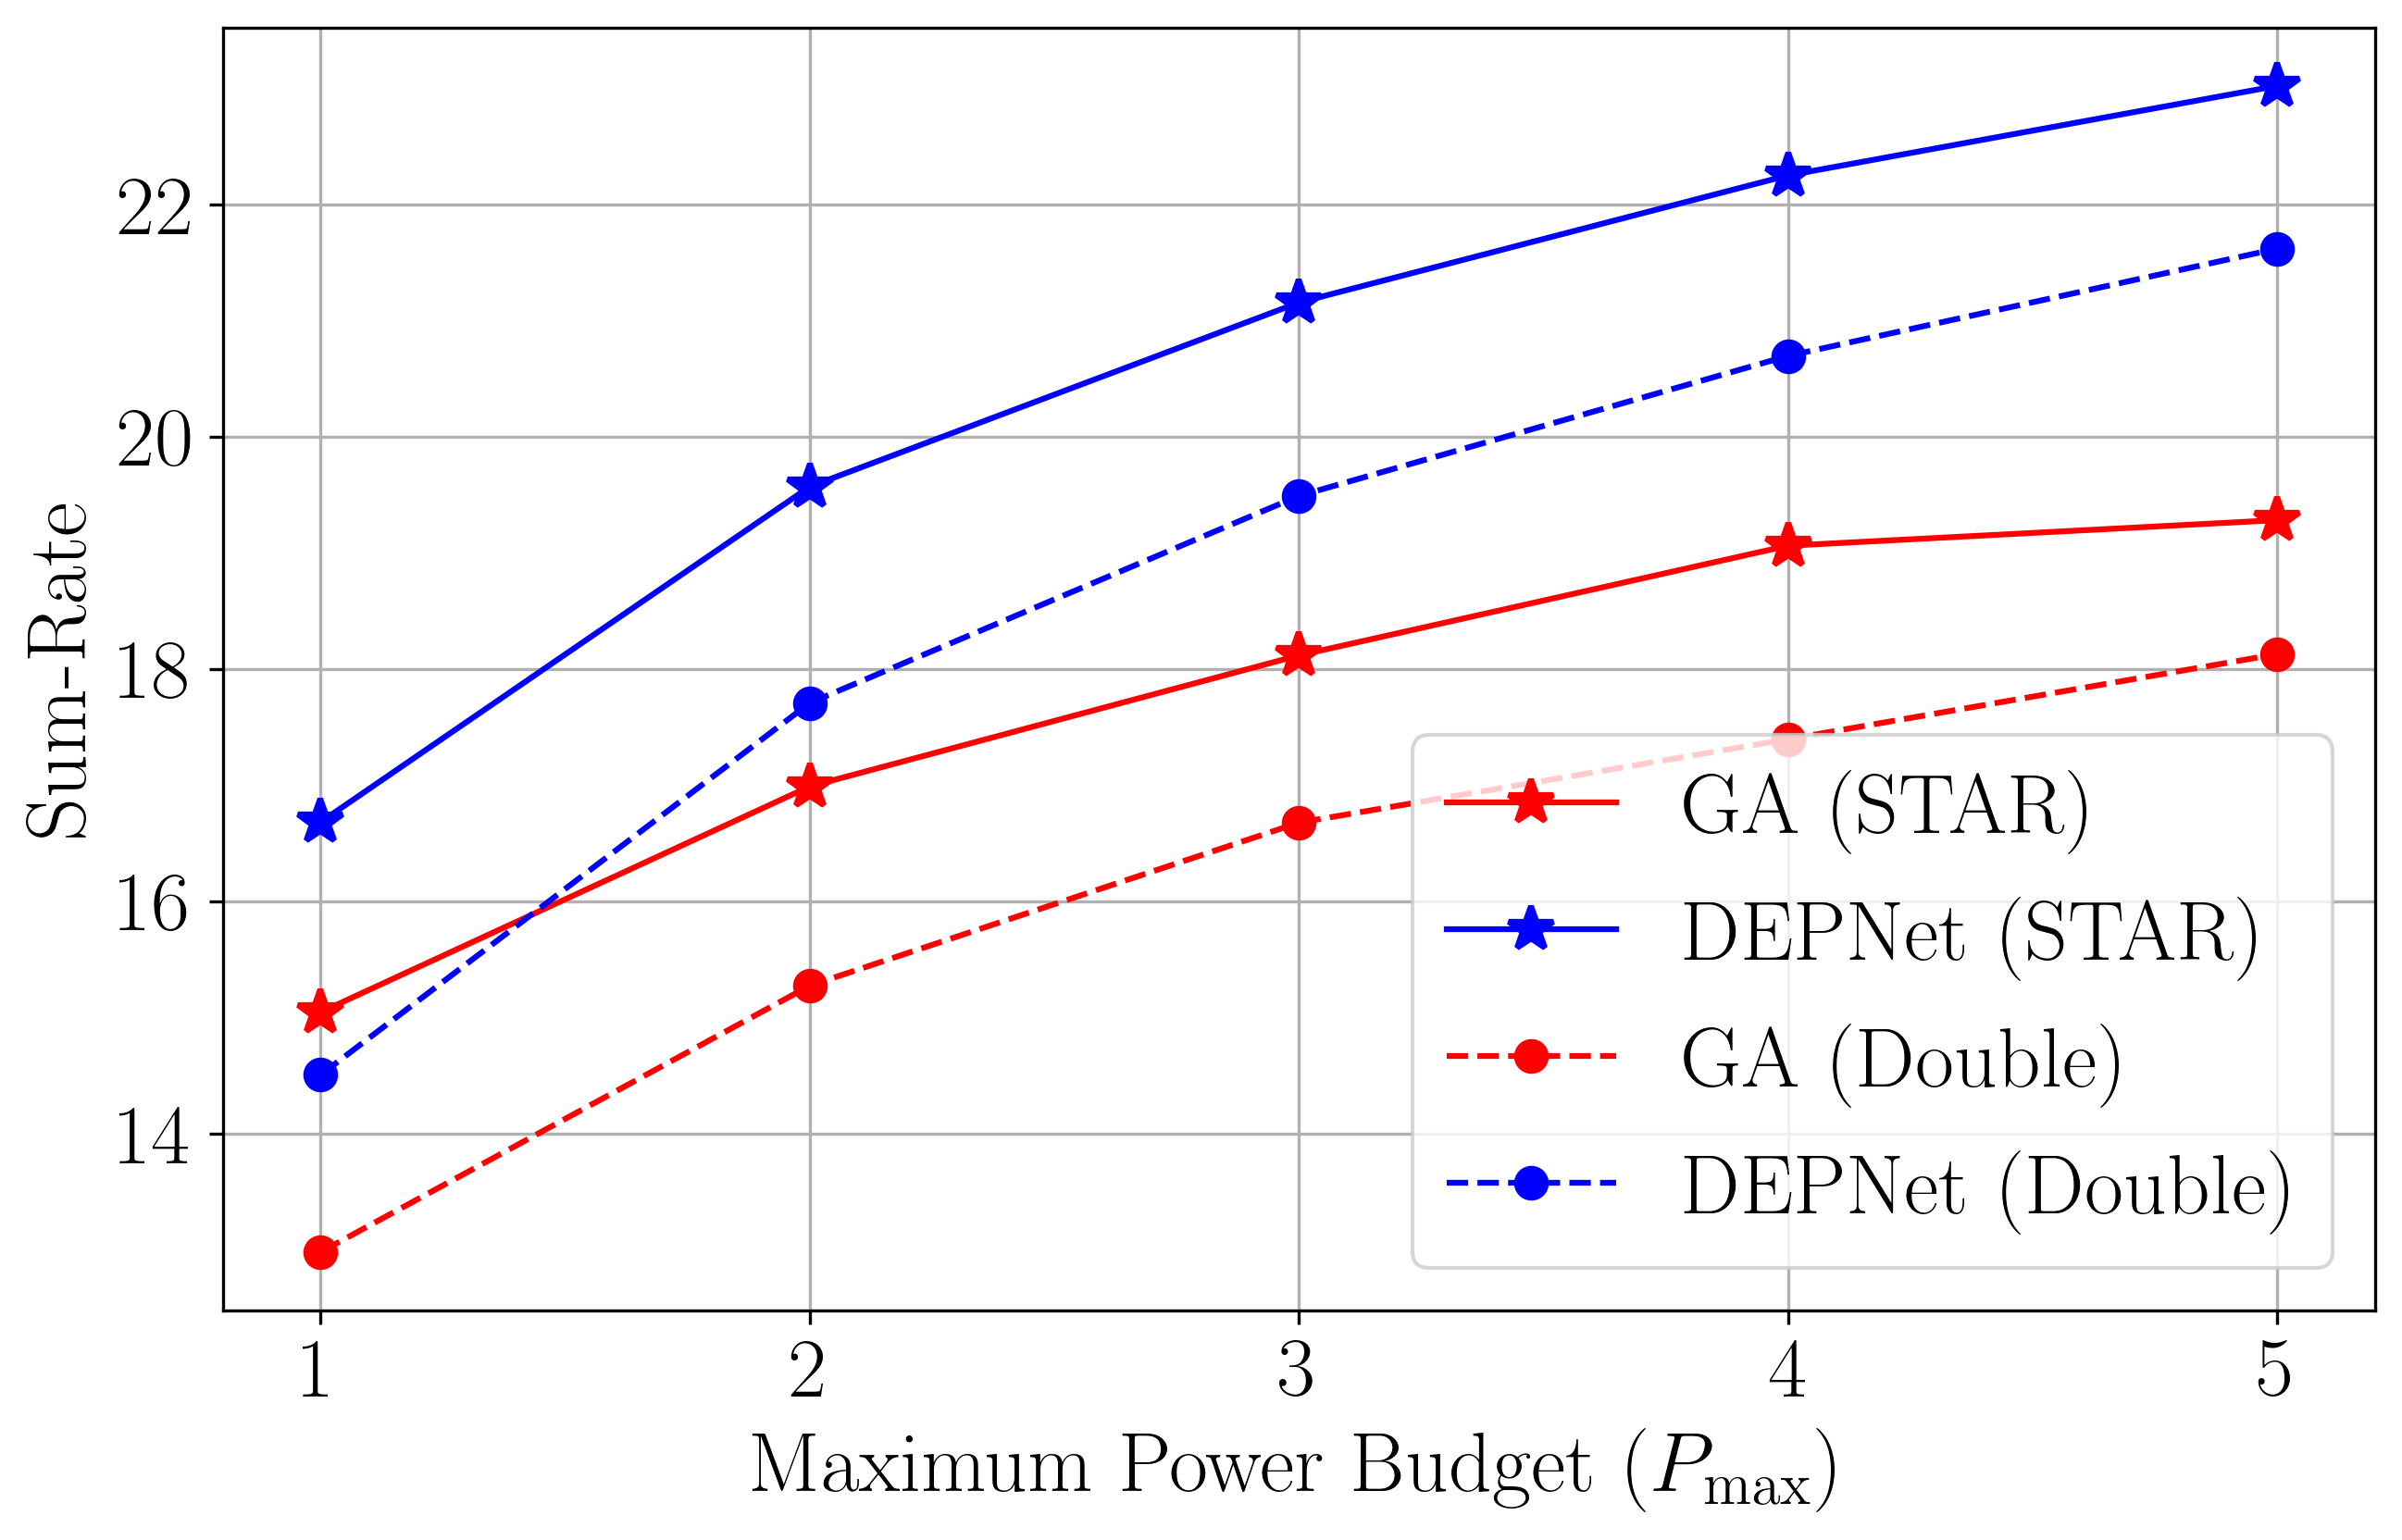

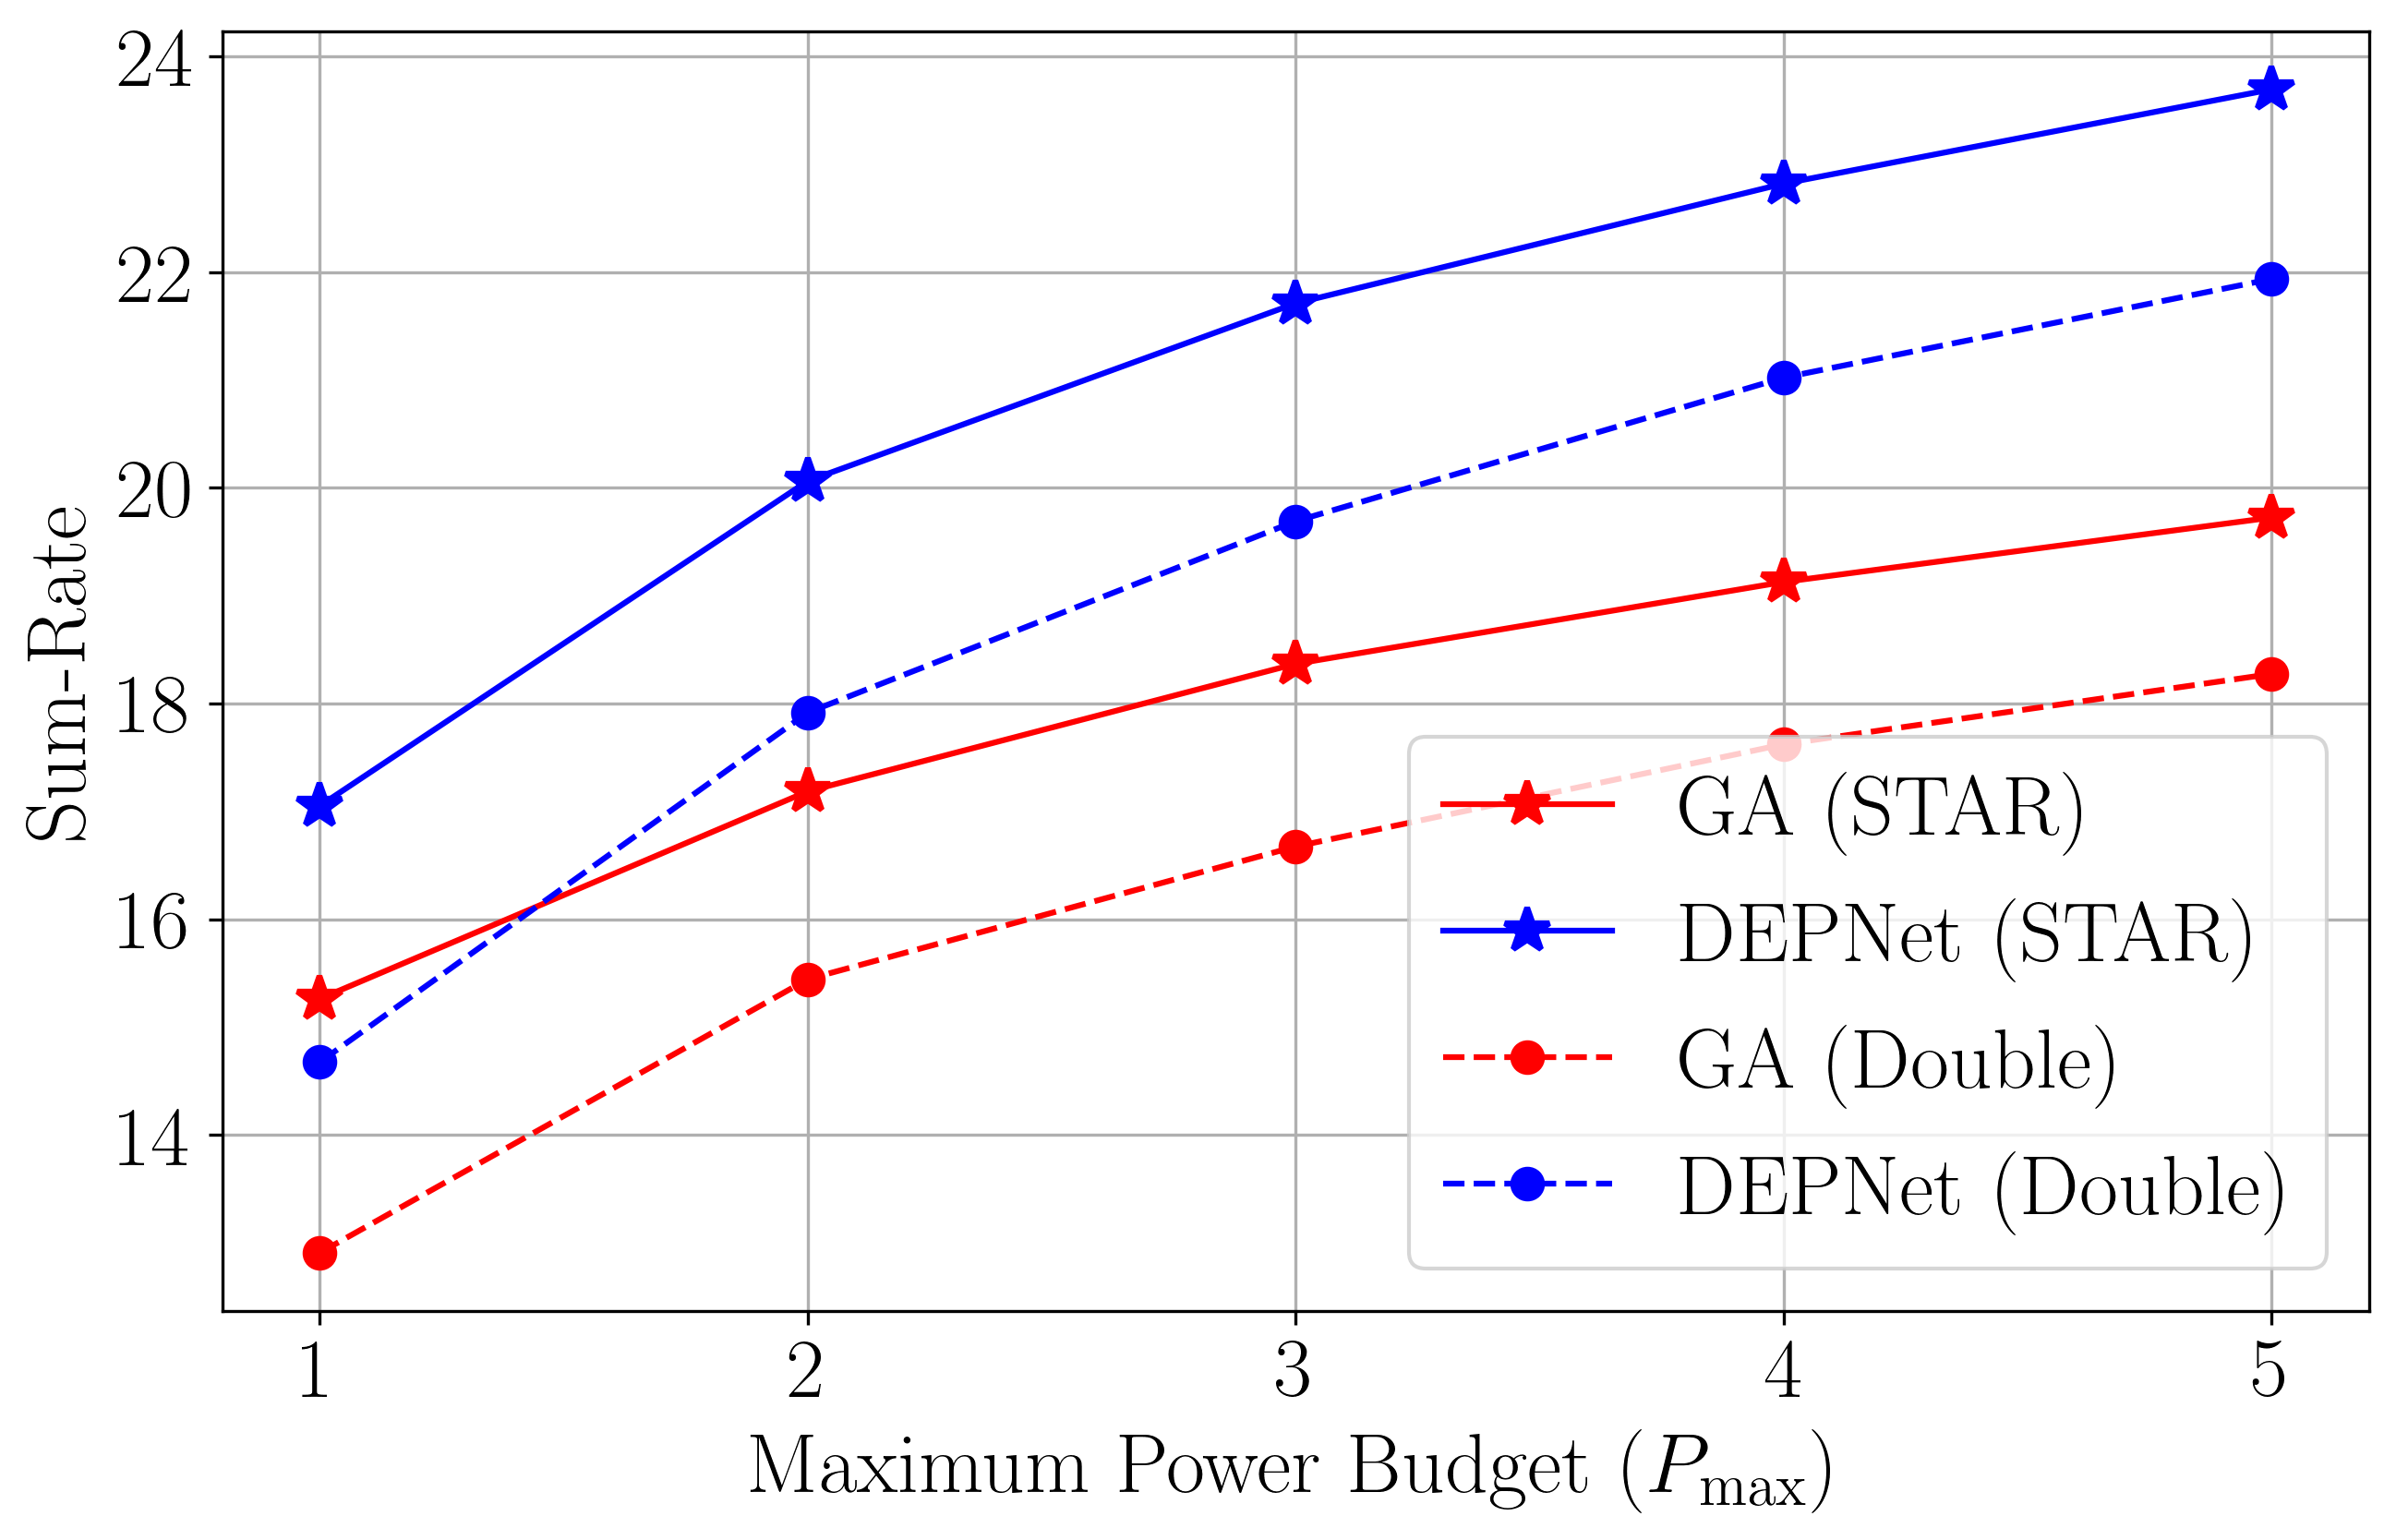

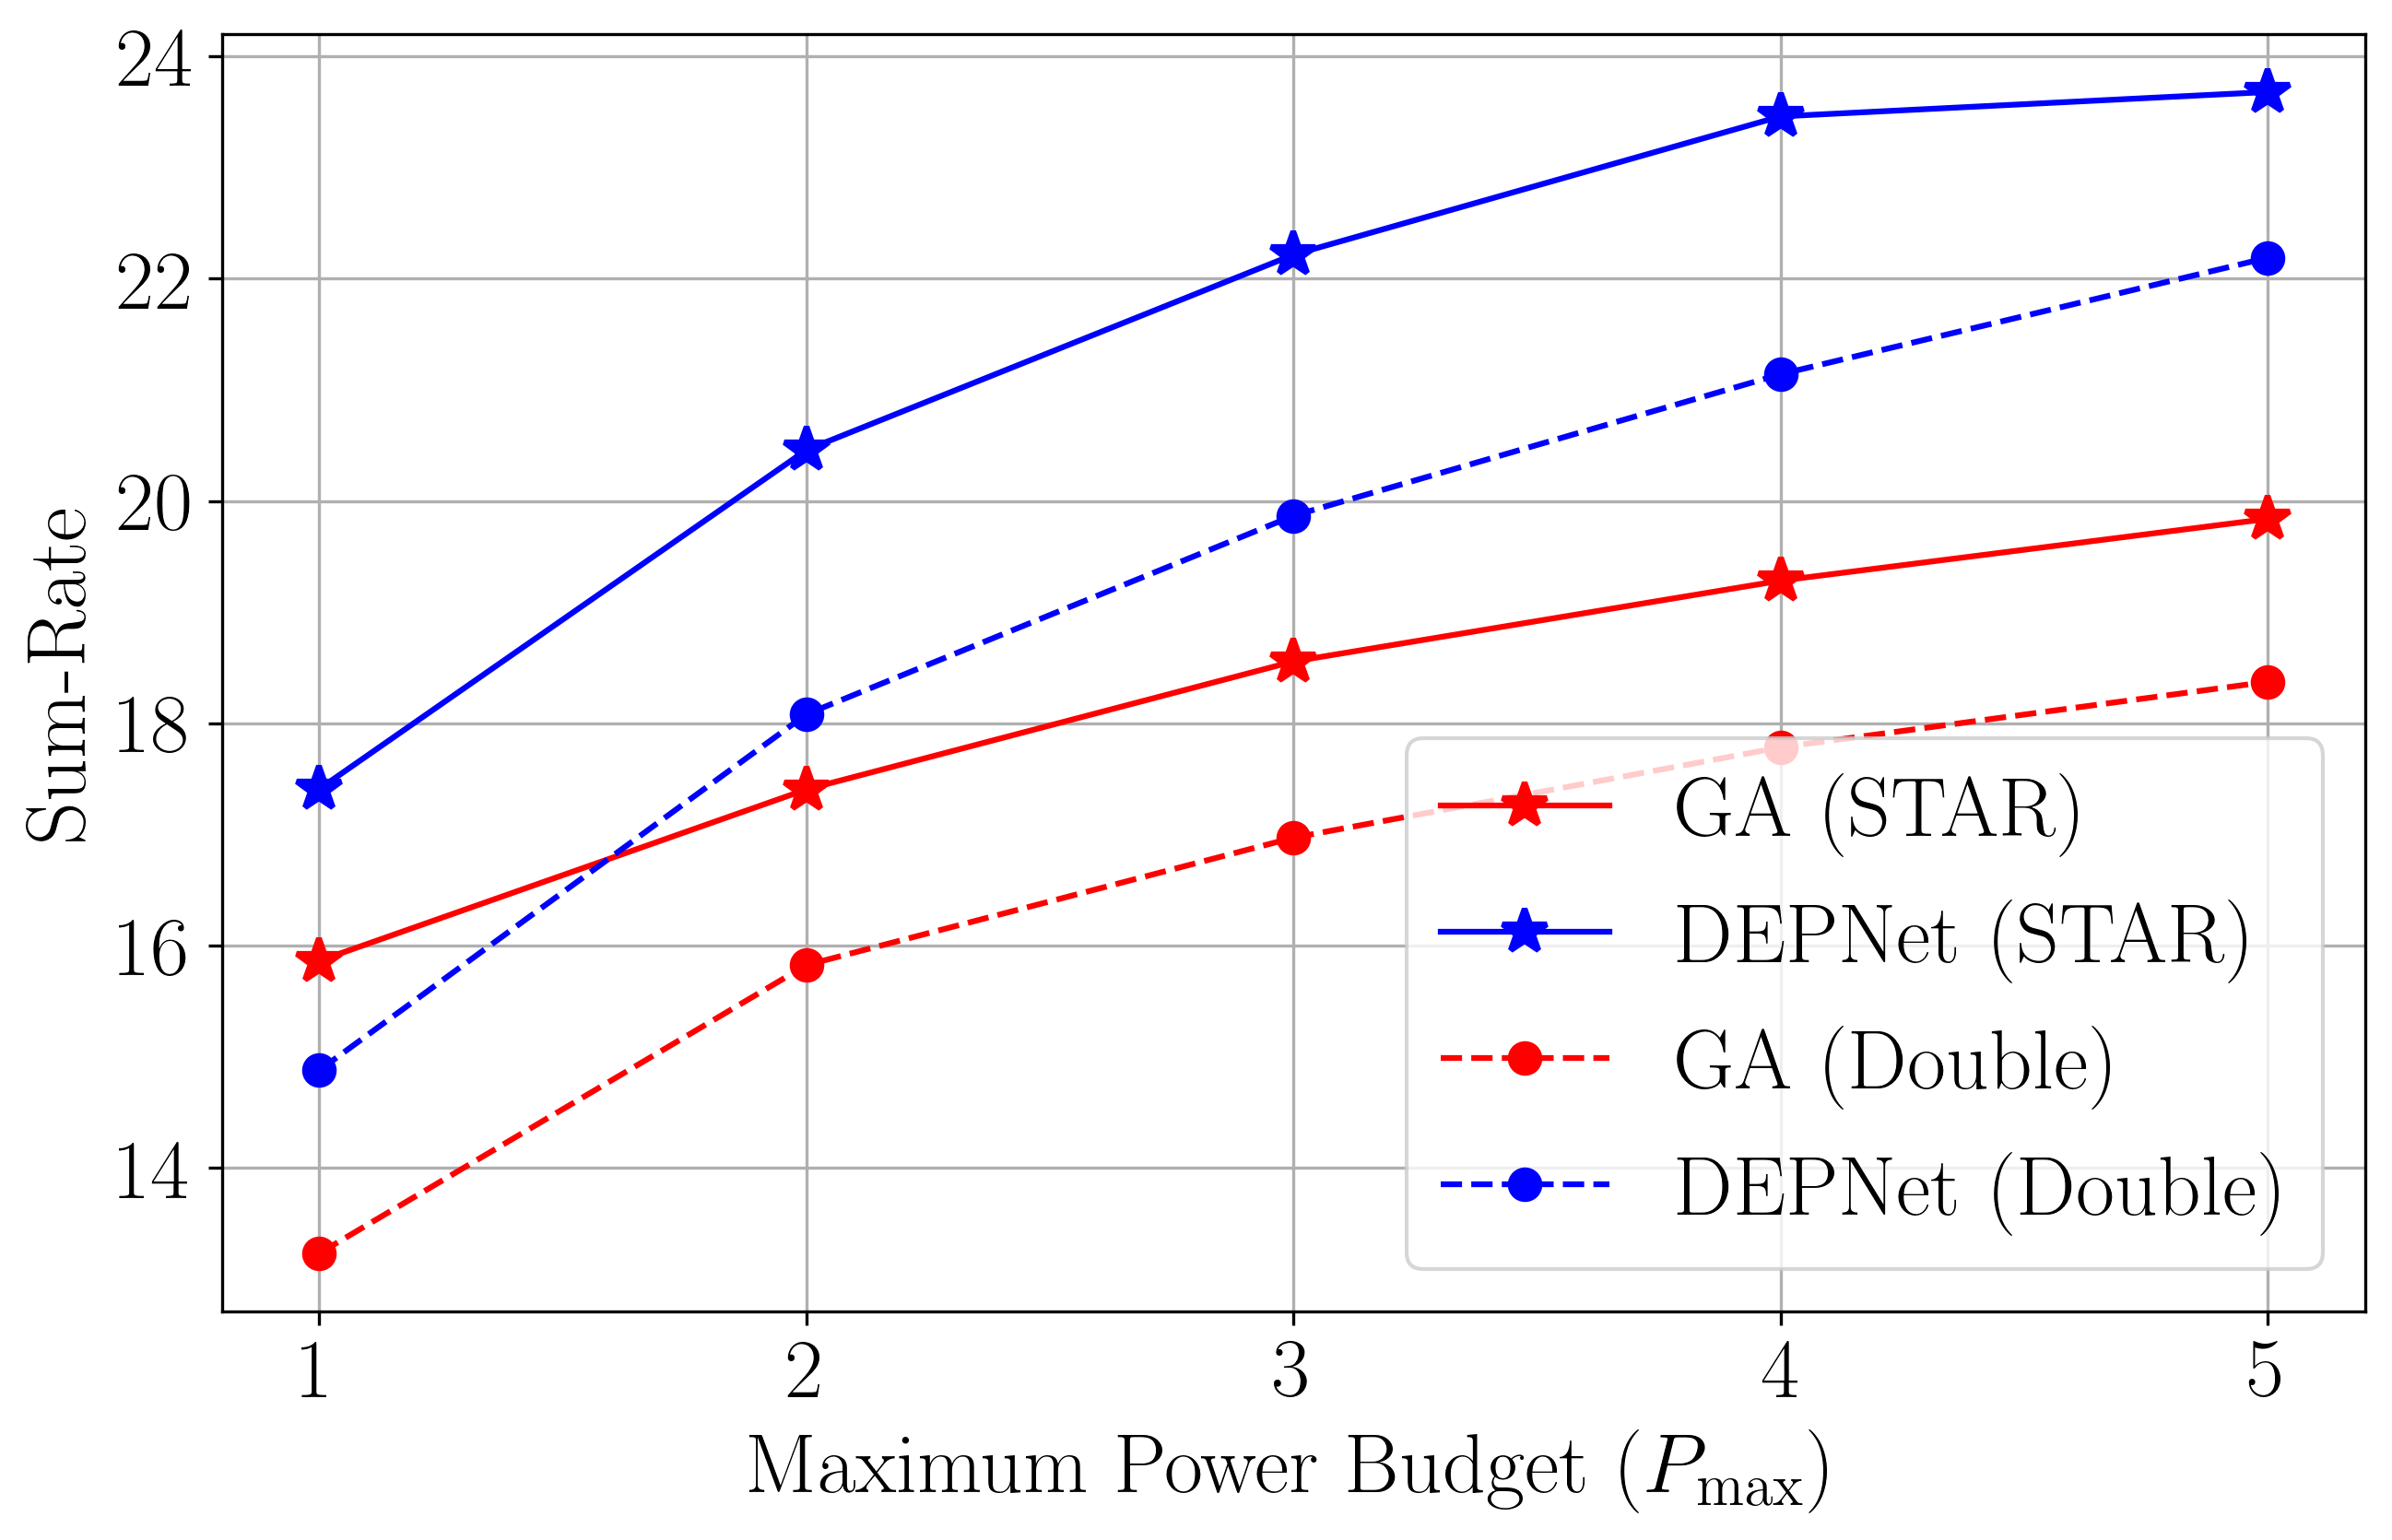

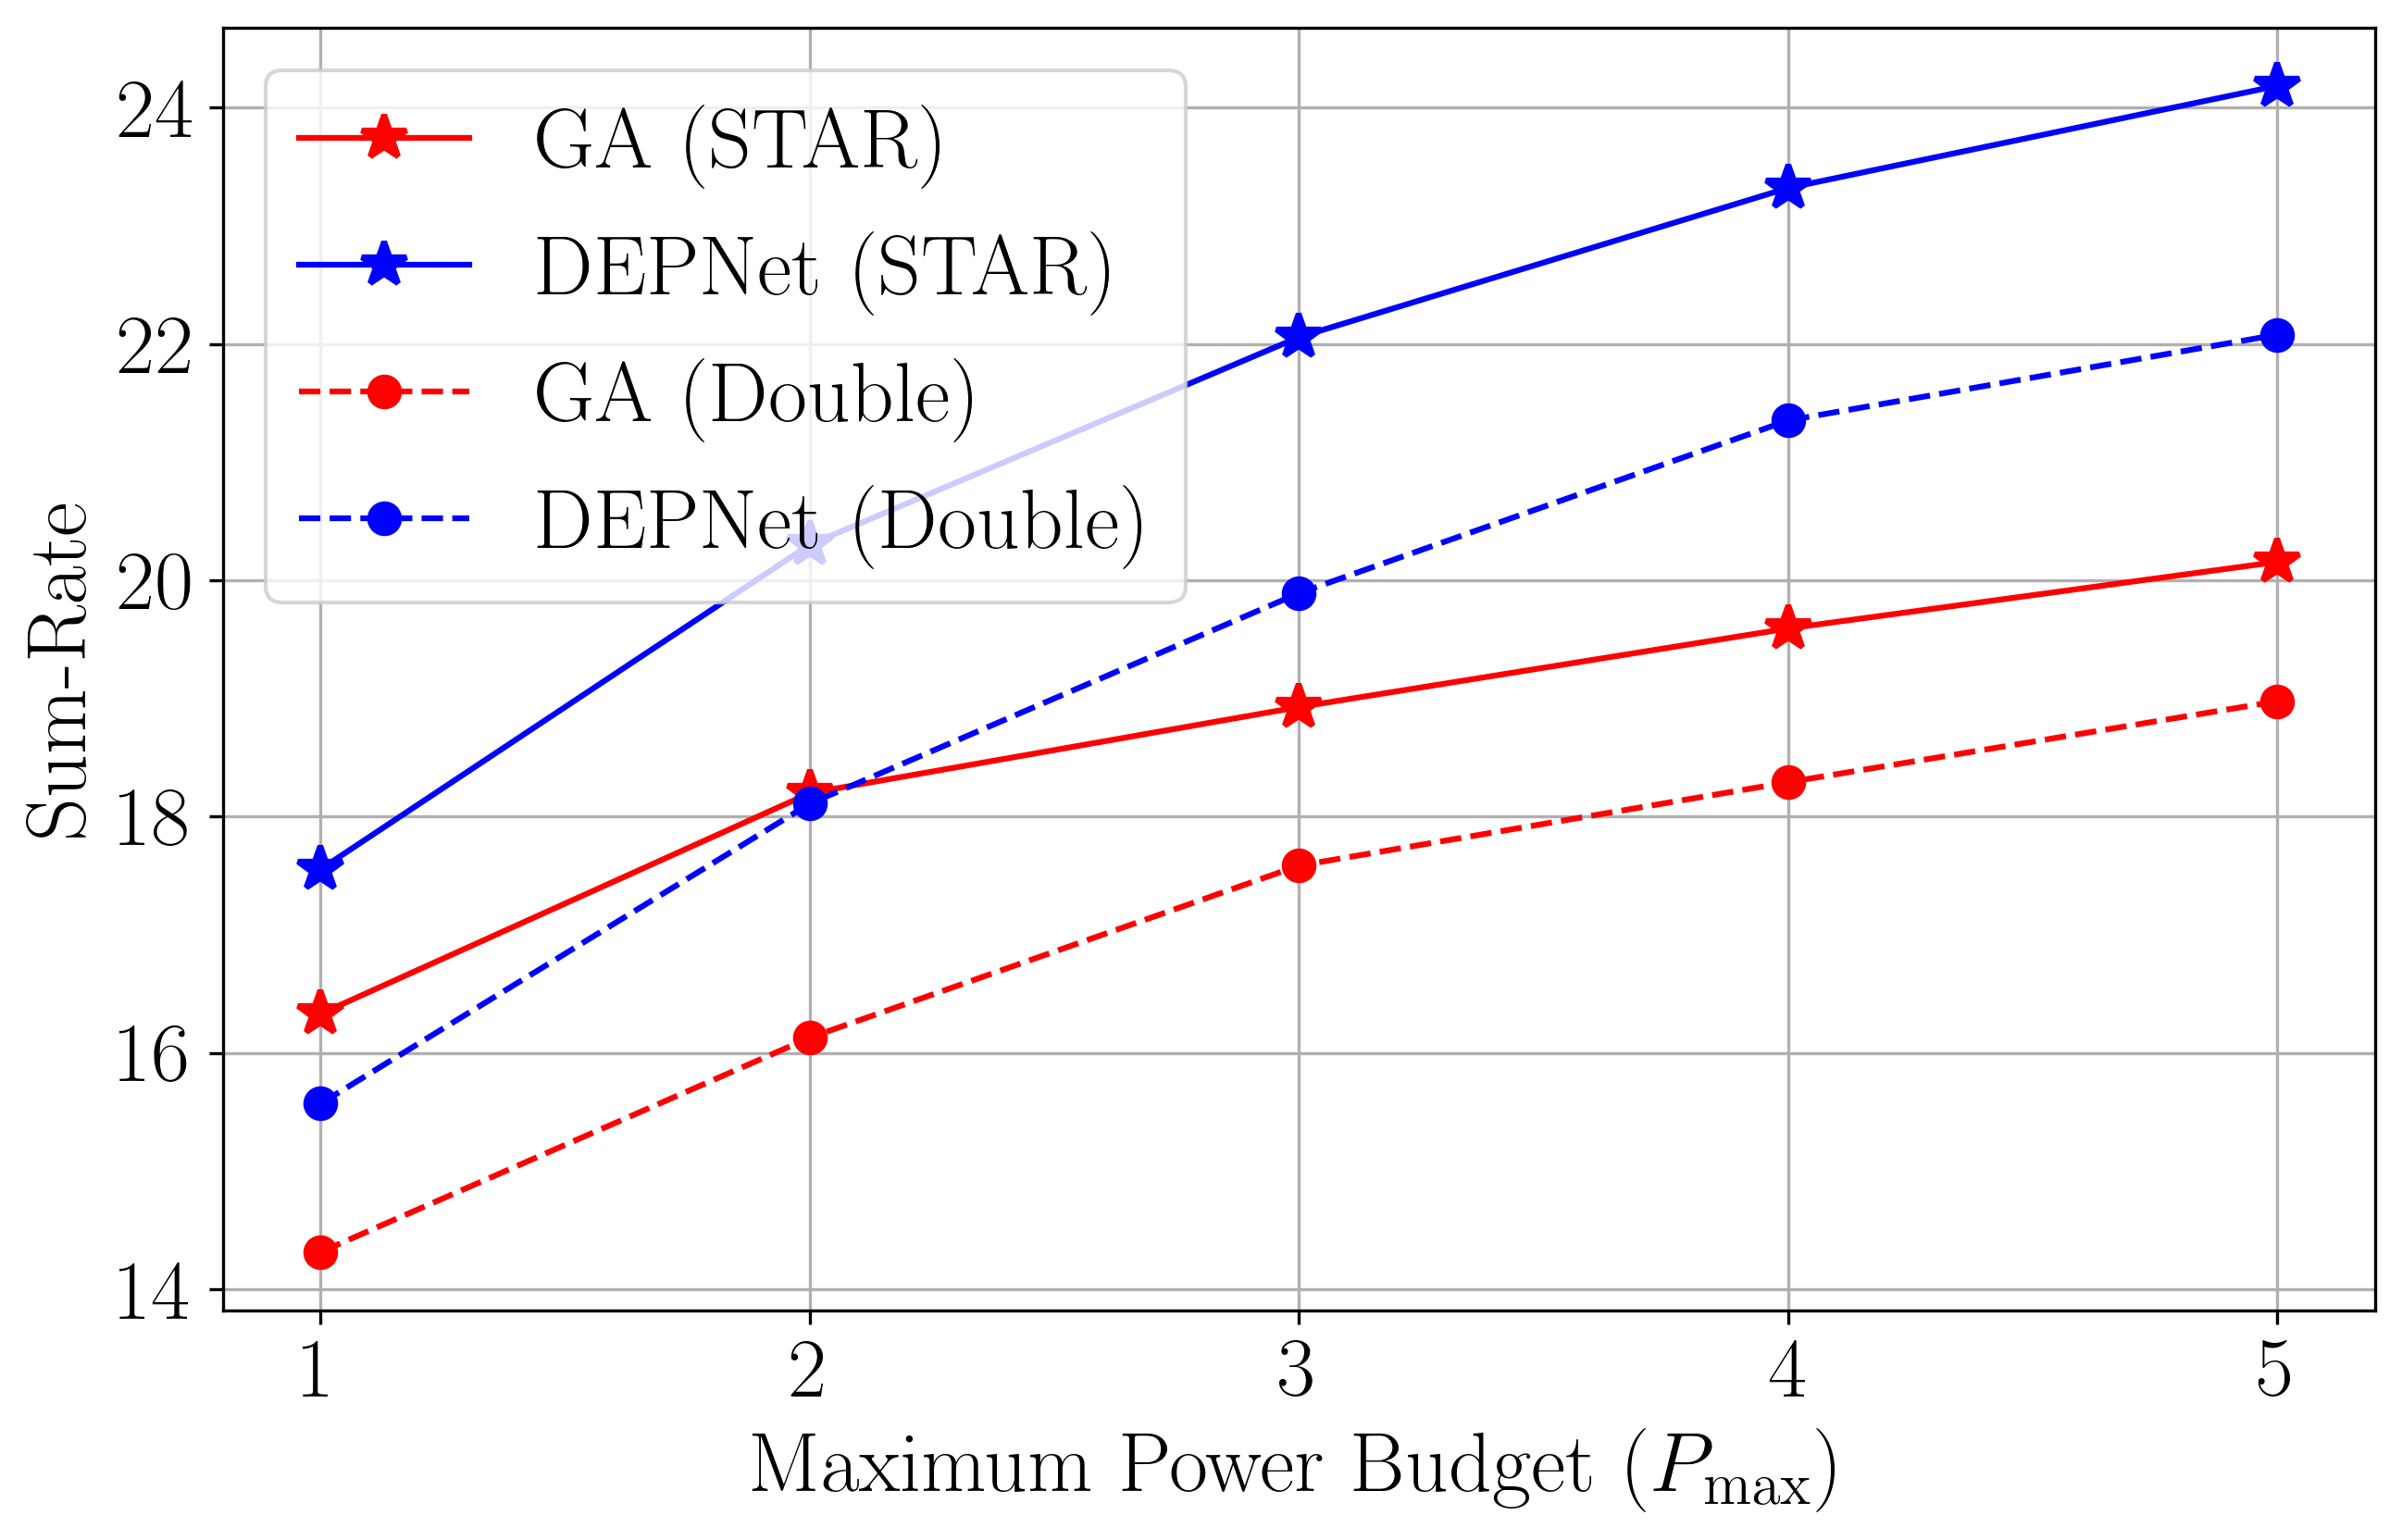

In [51]:
# Make a different graph for each r_min value and RIS mode (STAR, Double). 
# Plot P_max on the x-axis and sumrate on the y-axis, and a different line for GA and DEPNet.

# Data for two lines
x_values = range(1, 6)

r_mins = [2, 2.5, 3, 3.5]
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

for r_min in r_mins:
    
    # Get the dataset ids for the r_min value
    datasets = dataset_ids[r_min]
    
    # Get the data
    DEPNet_star = [dnn_res_500[str(dataset)][mode[0]][0] for dataset in datasets]
    DEPNet_double = [dnn_res_500[str(dataset)][mode[1]][0] for dataset in datasets]
    GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
    GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]
    
    # Create the plot
    plt.figure(figsize=(10, 6), dpi=300)

    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)
    
    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)
    
    # plt.title(f"Sum-Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
    plt.xlabel('Maximum Power Budget ($P_{\\max}$)', fontsize=22)
    plt.ylabel('Sum-Rate', fontsize=22)
    plt.tick_params(axis='x', labelsize=22)  # for x-axis
    plt.tick_params(axis='y', labelsize=22)  # for y-axis

    # Show legend
    plt.legend(fontsize=22)

    # Show grid
    plt.grid(True)

    # Save plot
    save_path_pc = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\{r_min}.png"
    save_path_mac = f"/Users/xaviermootoo/Documents/VScode/star-ris-depnet/New_Plots/500_iter/{r_min}.png"
    plt.savefig(save_path_mac, dpi=300)
    
    # Display the plot
    plt.show()
    plt.close()
